In [ ]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


EQUATIONS USED-
1. **Euclidean **Distance-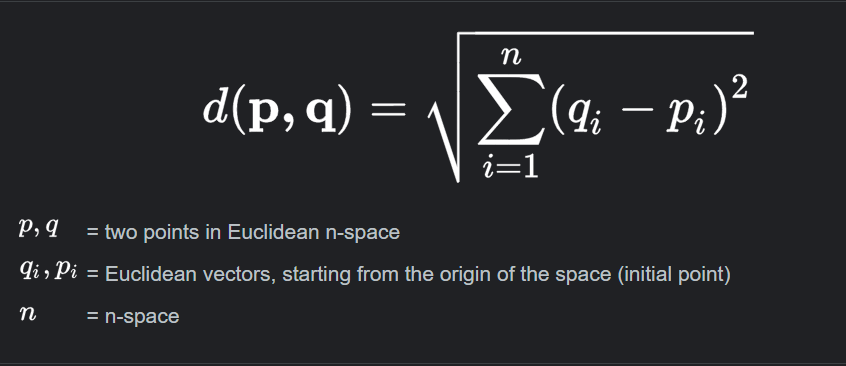

2. Calinscki Harbasz Score-
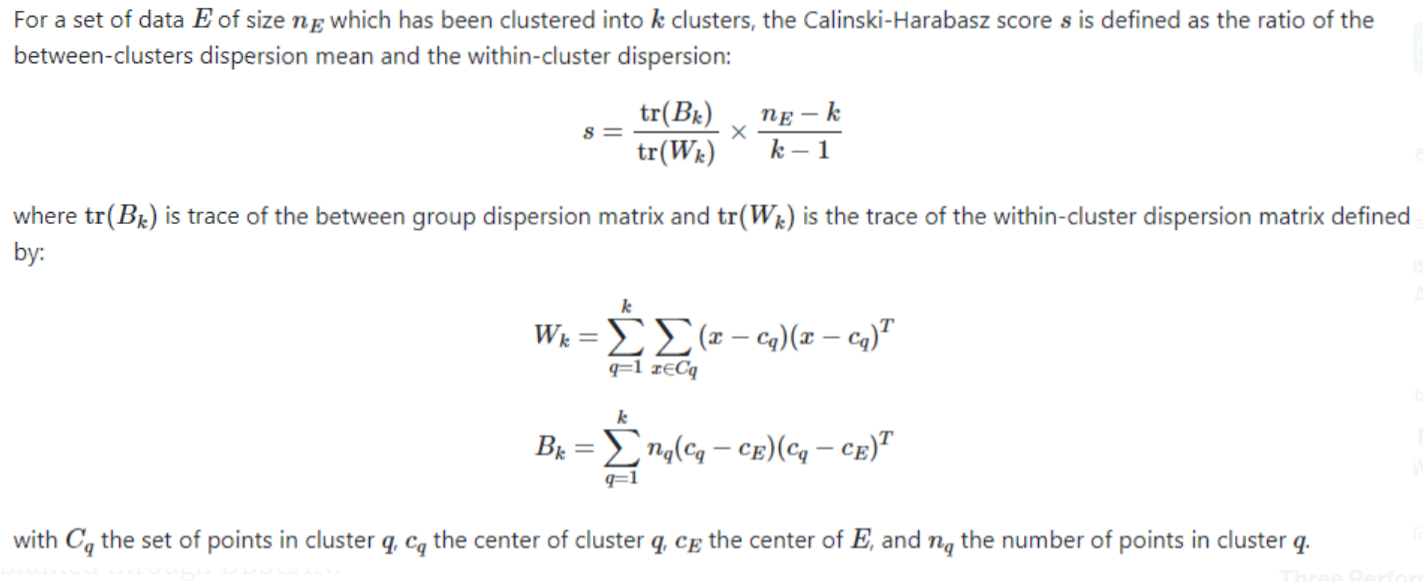
3. Silhouette Coefecient-
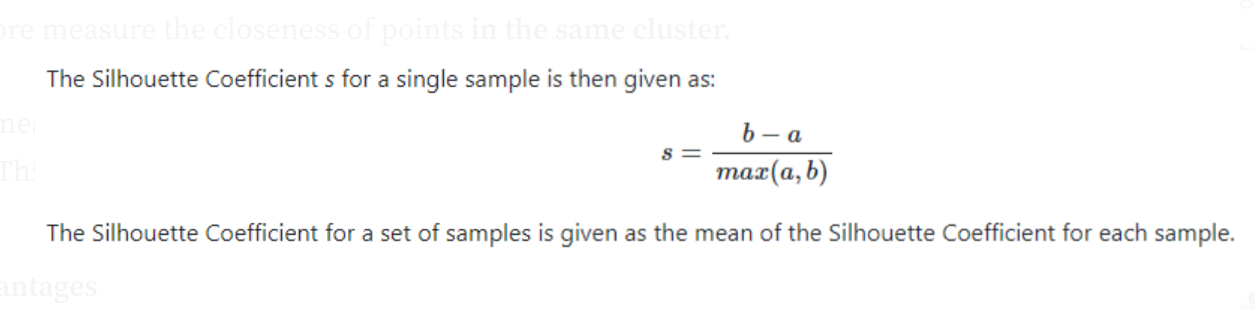
4.Feature Scaling-


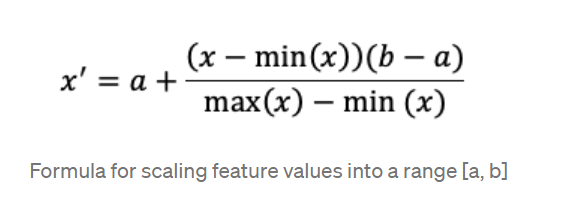

5. F1-Score-

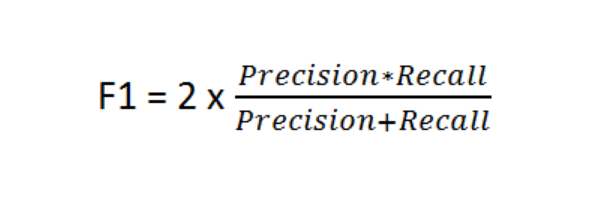

6. Accuracy-

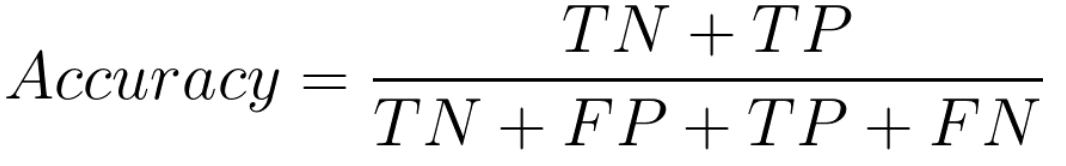

TN- TRUE NEGATIVE, TP- TRUE POSITIVE, FN- FALSE NEGATIVE, FP-FALSE POSITIVE

7. Dunn Index-


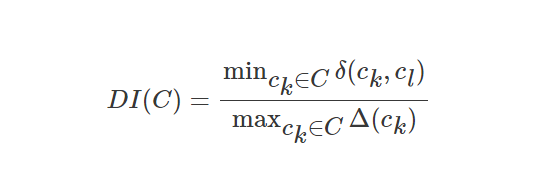


In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import *
import plotly as px

COMMON MAPPING FUNCTION TO FIND THE DISTANCE BETWEEN CENTROIDS OF THE PREDICTING CLUSTERS AND THE GIVEN CLUSTERS

In [283]:
def dis(df1,df2,n):
  dict_1=df1.to_dict('index')
  dict_2=df2.to_dict('index')
  row=df1.size
  col=df1.size
  arr=np.empty(shape=(row, col),dtype='object')
  arr1=[]
  dict_dist={}
  for i in range(0,n):
    for j in range(0,n):
      arr1.append(np.sqrt(((dict_1[i]['X1']-dict_2[j]['X1'])**2)+((dict_1[i]['X2']-dict_2[j]['X2'])**2)+((dict_1[i]['X3']-dict_2[j]['X3'])**2)))
    dict_dist[i]=arr1
    arr1=[]
  dict_map={}
  for i in range(0,n):
    x=min(dict_dist.get(i))
    arr=[]
    arr=dict_dist.get(i)
    for j in range(0,len(arr)):
      if x==arr[j]:
        dict_map[i]=j
  return(dict_map)

In [256]:
def map(df,dict_map,x):
  def get_key_from_value(d, val):
      keys = [k for k, v in dict_map.items() if v == val]
      if keys:
        return keys[0]
      return None
  
  if x==1:
    pred=np.array(df.pred)
  elif x==2:
    pred=np.array(df.pred_hierarchial)
  clus_map=[]
  for i in range(len(pred)):
    for j in range(len(dict_map)):
      if pred[i]==dict_map[j]:
        clus_map.append(get_key_from_value(dict_map, dict_map[j]))
  #clus_map
  if x==1:
    df['map_pred']=clus_map
  elif x==2:
    df['map_pred_hierarchial']=clus_map

In [259]:
def data2_map(df,dict_map,x):
  def get_key_from_value(d, val):
      keys = [k for k, v in dict_map.items() if v == val]
      if keys:
        return keys[0]
      return None
  #dict_map[3]=3
  if x==1:
    dict_map[3]=2
    pred=np.array(df.pred)
  elif x==2:
    dict_map[3]=3
    pred=np.array(df.pred_hierarchial)
  clus_map=[]
  for i in range(len(pred)):
    for j in range(len(dict_map)):
      if pred[i]==dict_map[j]:
        clus_map.append(get_key_from_value(dict_map, dict_map[j]))
  #clus_map
  if x==1:
    df['map_pred']=clus_map
  elif x==2:
    df['map_pred_hierarchial']=clus_map

In [ ]:
from google.colab import files
uploaded = files.upload()

DATASET 1

In [258]:
data1= pd.read_csv("Data1.csv")
data1['Class']=data1['Class'].subtract(1)
data1

Unnamed: 0        X1        X2        X3  Class
0             1 -0.063274  0.027734  0.022683      0
1             2 -0.000731  0.048211  0.069198      0
2             3 -0.060767 -0.009080  0.053085      0
3             4  0.013252 -0.011876  0.055324      0
4             5 -0.054508 -0.003813  0.001738      0
..          ...       ...       ...       ...    ...
207         208  0.175738 -0.053478 -2.733752      6
208         209  0.396046 -0.858377 -3.126866      6
209         210 -0.406362 -0.334541 -2.885598      6
210         211 -0.299275  0.071281 -3.642585      6
211         212 -0.506192  0.433538 -2.608597      6

[212 rows x 5 columns]

In [260]:
x1=data1.iloc[:,1:4].values
#print(x1)

In [261]:
y=data1.iloc[:,4:5]
#print(y)

In [262]:
y1=y.to_numpy()
#print(y1)

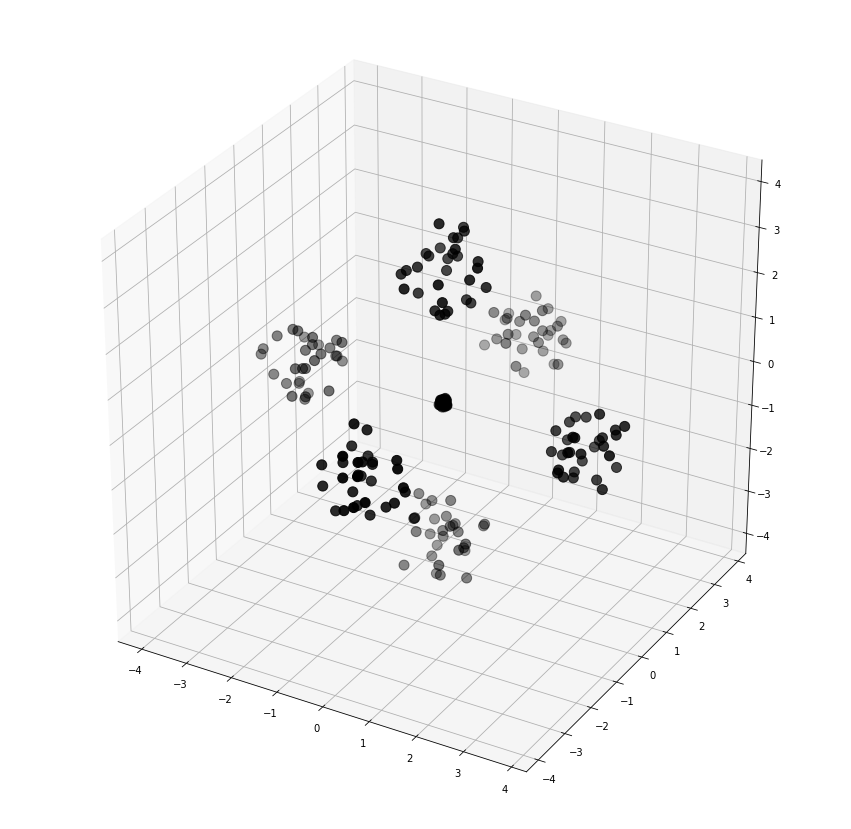

In [263]:
#Plot original dataset
fig = plt.figure(figsize = (15,15))

ax = fig.add_subplot(111, projection='3d')

data1.set_axis(['Index','X1','X2','X3', 'Class'], axis=1, inplace=True)
ax.scatter(data1["X1"],data1["X2"],data1["X3"], c="Black", s=100)


KMEANS Dataset-1

In [273]:
#KMeans
data1_kmeans=KMeans(n_clusters=7, random_state=42)
data1_kmeans.fit(x1)

KMeans(n_clusters=7, random_state=42)

In [274]:
data1['pred']=(data1_kmeans.labels_)
data1
# mapping the classes of the predicted class to the original class given in dataset
#for i in kmeans_df:
#  finals_kmeans=np.where(kmeans_df==kmeans_df, kmeans_df +1, kmeans_df)
#print(finals_kmeans)

Index        X1        X2        X3  Class  pred
0        1 -0.063274  0.027734  0.022683      0     4
1        2 -0.000731  0.048211  0.069198      0     4
2        3 -0.060767 -0.009080  0.053085      0     4
3        4  0.013252 -0.011876  0.055324      0     4
4        5 -0.054508 -0.003813  0.001738      0     4
..     ...       ...       ...       ...    ...   ...
207    208  0.175738 -0.053478 -2.733752      6     5
208    209  0.396046 -0.858377 -3.126866      6     5
209    210 -0.406362 -0.334541 -2.885598      6     5
210    211 -0.299275  0.071281 -3.642585      6     5
211    212 -0.506192  0.433538 -2.608597      6     5

[212 rows x 6 columns]

ACCURACY BEFORE MAPPING

In [275]:
# Accuracy and F1 score
print("F1-SCORE")
l2= metrics.f1_score(y, data1.pred, average="macro")
print(l2)
print("ACCURACY")
l3=accuracy_score(y,data1.pred)
print(l3)

F1-SCORE
0.0
ACCURACY
0.0


we are not confident with the accuracy as kmeans generates cluster numbers randomly

In [276]:
import seaborn as sns
import matplotlib.pyplot as plt

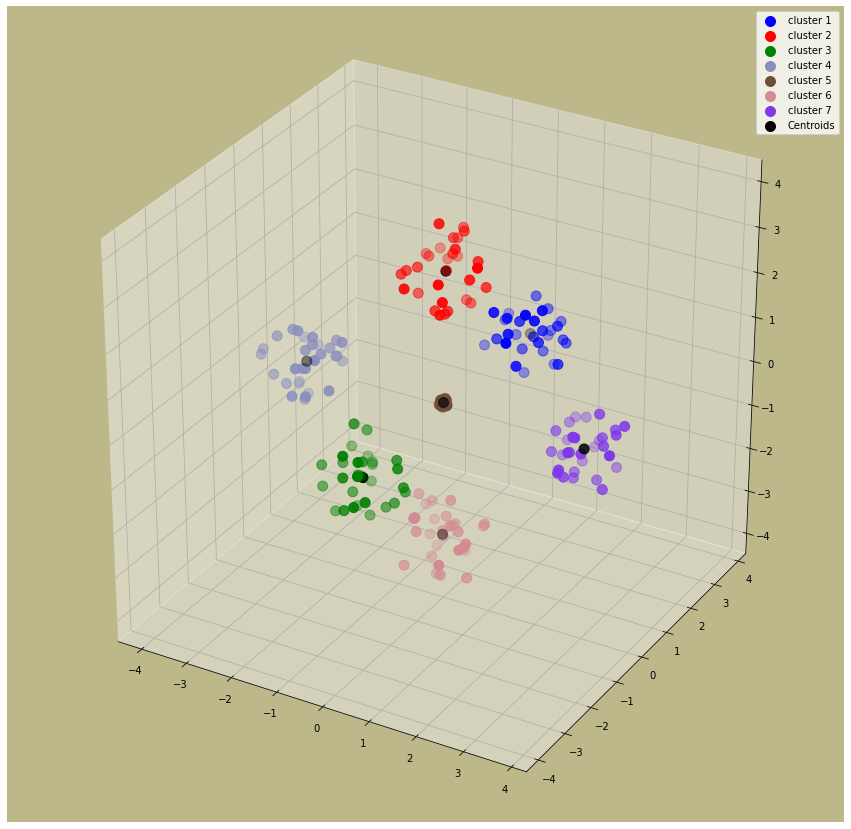

In [277]:
#  3D scatter plots of clusters acc to kmeans clusters

fig = plt.figure(figsize = (15,15))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1[data1.pred==0, 0], x1[data1.pred==0, 1],x1[data1.pred == 0,2], s=100,  color = 'blue', label = "cluster 1")
ax.scatter(x1[data1.pred==1, 0], x1[data1.pred==1, 1],x1[data1.pred == 1,2], s=100,  color = 'red', label = "cluster 2")
ax.scatter(x1[data1.pred==2, 0], x1[data1.pred==2, 1],x1[data1.pred == 2,2], s=100,  color = 'green', label = "cluster 3")
ax.scatter(x1[data1.pred==3, 0], x1[data1.pred==3, 1],x1[data1.pred == 3,2], s=100,  color = '#8A8EBD', label = "cluster 4")
ax.scatter(x1[data1.pred==4, 0], x1[data1.pred==4, 1],x1[data1.pred == 4,2], s=100,  color = '#6F4E37', label = "cluster 5")
ax.scatter(x1[data1.pred==5, 0], x1[data1.pred==5, 1],x1[data1.pred == 5,2], s=100,  color = '#D58A94', label = "cluster 6")
ax.scatter(x1[data1.pred==6, 0], x1[data1.pred==6, 1],x1[data1.pred == 6,2], s=100,  color = '#7F38EC', label = "cluster 7")
ax.scatter(data1_kmeans.cluster_centers_[:, 0], data1_kmeans.cluster_centers_[:,1], data1_kmeans.cluster_centers_[:,2], s = 100, c = 'Black', label = 'Centroids')
ax.set_facecolor("#BCB88A")
ax.legend()
plt.show()

Starting with mapping the predicted and given clusters

In [279]:
x=data1_kmeans.cluster_centers_
df2=pd.DataFrame(x,columns=['X1','X2','X3'])
df2.index.name='pred'
df2

X1        X2        X3
pred                              
0     0.139987  3.081747  0.074505
1    -0.006312  0.091942  2.872362
2     0.022712 -2.968136 -0.111775
3    -2.995188 -0.013736  0.088240
4    -0.004241  0.004758  0.007247
5    -0.047262  0.045801 -3.042762
6     2.999538 -0.001131 -0.140060

In [280]:
df1=data1[['X1','X2','X3','Class']]
df1=df1.groupby(['Class']).mean()
n=len(df1.index)
df1

X1        X2        X3
Class                              
0     -0.004241  0.004758  0.007247
1      2.999538 -0.001131 -0.140060
2     -2.995188 -0.013736  0.088240
3      0.139987  3.081747  0.074505
4      0.022712 -2.968136 -0.111775
5     -0.006312  0.091942  2.872362
6     -0.047262  0.045801 -3.042762

In [284]:
dict_map=dis(df1,df2,n)
dict_map

{0: 4, 1: 6, 2: 3, 3: 0, 4: 2, 5: 1, 6: 5}

In [289]:
map(data1,dict_map,1)

ACCURACY AFTER MAPPING

In [290]:
from sklearn.metrics import *
print(accuracy_score(data1.Class, data1.map_pred))
print(f1_score(data1.Class, data1.map_pred,average=None))

1.0
[1. 1. 1. 1. 1. 1. 1.]


HIERARCHICAL DATASET-1

In [306]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

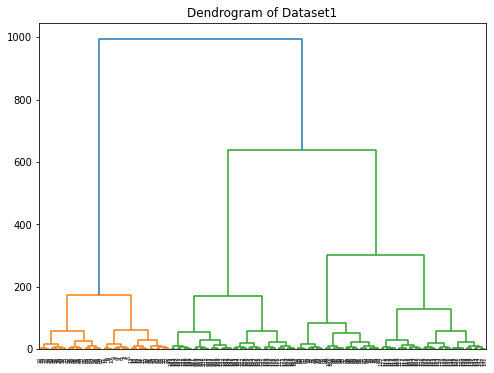

In [307]:
#DENDOGRAM
plt.figure(figsize=(8,6))  
plt.title("Dendrogram of Dataset1")  
dend1 = shc.dendrogram(shc.linkage(data1, method='ward'))

In [308]:
#Clustering Hierarchical
cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  
a1=cluster.fit_predict(data1.iloc[:,1:4])
data1['pred_hierarchial']=a1

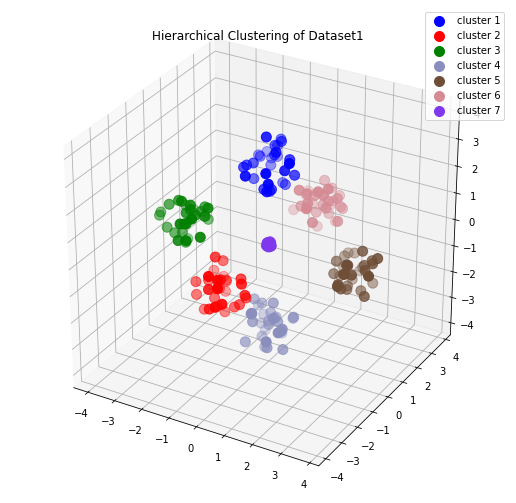

In [473]:
#HIERARCHICAL CLUSTERS PLOT FOR DATASET-1
fig = plt.figure(figsize = (9,9))
ax = plt.axes(projection='3d')
ax.scatter(x1[a1==0, 0], x1[a1==0, 1],x1[a1 == 0,2], s=100,  color = 'blue', label = "cluster 1")
ax.scatter(x1[a1==1, 0], x1[a1==1, 1],x1[a1 == 1,2], s=100,  color = 'red', label = "cluster 2")
ax.scatter(x1[a1==2, 0], x1[a1==2, 1],x1[a1 == 2,2], s=100,  color = 'green', label = "cluster 3")
ax.scatter(x1[a1==3, 0], x1[a1==3, 1],x1[a1 == 3,2], s=100,  color = '#8A8EBD', label = "cluster 4")
ax.scatter(x1[a1==4, 0], x1[a1==4, 1],x1[a1 == 4,2], s=100,  color = '#6F4E37', label = "cluster 5")
ax.scatter(x1[a1==5, 0], x1[a1==5, 1],x1[a1 == 5,2], s=100,  color = '#D58A94', label = "cluster 6")
ax.scatter(x1[a1==6, 0], x1[a1==6, 1],x1[a1 == 6,2], s=100,  color = '#7F38EC', label = "cluster 7")
plt.legend()
plt.title("Hierarchical Clustering of Dataset1")
plt.show()

In [310]:
# Accuracy before mapping
# F1 score
l2=f1_score(data1['Class'],a1, average=None)
print(l2)
l3=accuracy_score(data1['Class'],a1)
print(l3)

[0. 0. 1. 0. 0. 0. 0.]
0.14150943396226415


STARTED MAPPING

In [311]:
from scipy.cluster.hierarchy import centroid, fcluster
from scipy.spatial.distance import pdist
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
hier_predict = cluster.fit_predict(data1.iloc[:,1:4])
cluster_labels = cluster.labels_
clf = NearestCentroid()
clf.fit(data1.iloc[:,1:4], hier_predict)
#print("Centroids:")
#print(clf.centroids_)
df2_hier=pd.DataFrame(clf.centroids_,columns=['X1','X2','X3'])
df2_hier.index.name='hier_pred'
df2_hier

X1        X2        X3
hier_pred                              
0         -0.006312  0.091942  2.872362
1          0.022712 -2.968136 -0.111775
2         -2.995188 -0.013736  0.088240
3         -0.047262  0.045801 -3.042762
4          2.999538 -0.001131 -0.140060
5          0.139987  3.081747  0.074505
6         -0.004241  0.004758  0.007247

In [312]:
df1=data1[['X1','X2','X3','Class']]
df1=df1.groupby(['Class']).mean()
df1

X1        X2        X3
Class                              
0     -0.004241  0.004758  0.007247
1      2.999538 -0.001131 -0.140060
2     -2.995188 -0.013736  0.088240
3      0.139987  3.081747  0.074505
4      0.022712 -2.968136 -0.111775
5     -0.006312  0.091942  2.872362
6     -0.047262  0.045801 -3.042762

In [313]:
dict_map=dis(df1,df2_hier,n)
dict_map

{0: 6, 1: 4, 2: 2, 3: 5, 4: 1, 5: 0, 6: 3}

In [314]:
map(data1,dict_map,2)

In [315]:
data1

Index        X1        X2        X3  Class  pred  map_pred  \
0        1 -0.063274  0.027734  0.022683      0     4         0   
1        2 -0.000731  0.048211  0.069198      0     4         0   
2        3 -0.060767 -0.009080  0.053085      0     4         0   
3        4  0.013252 -0.011876  0.055324      0     4         0   
4        5 -0.054508 -0.003813  0.001738      0     4         0   
..     ...       ...       ...       ...    ...   ...       ...   
207    208  0.175738 -0.053478 -2.733752      6     5         6   
208    209  0.396046 -0.858377 -3.126866      6     5         6   
209    210 -0.406362 -0.334541 -2.885598      6     5         6   
210    211 -0.299275  0.071281 -3.642585      6     5         6   
211    212 -0.506192  0.433538 -2.608597      6     5         6   

     pred_hierarchial  map_pred_hierarchial  
0                   6                     0  
1                   6                     0  
2                   6                     0  
3                   6                     0  
4                   6                     0  
..                ...                   ...  
207                 3                     6  
208                 3                     6  
209                 3                     6  
210                 3                     6  
211                 3                     6  

[212 rows x 9 columns]

ACCURACY HIERARCHICAL AFTER MAPPING

In [317]:
from sklearn.metrics import *
print(accuracy_score(data1.Class, data1.map_pred_hierarchial))
print(f1_score(data1.Class, data1.map_pred_hierarchial,average=None))

1.0
[1. 1. 1. 1. 1. 1. 1.]


DATASET-2

In [318]:
data2= pd.read_csv("Data2.csv")
data2['Class']=data2['Class'].subtract(1)
print(data2)

    Unnamed: 0         X         Y         C  Class
0           X1  3.277701  0.814082  0.326574      0
1           X2  0.387577  0.176780  0.888046      0
2           X3  0.268546  0.582963  0.080981      0
3           X4  2.031145  0.244597  0.643921      0
4           X5  0.188677  0.461280  0.496633      0
..         ...       ...       ...       ...    ...
399       X400  3.248655  2.297291  3.388138      2
400          X  4.100000  5.100000  0.504558      3
401        X.1  3.900000  4.900000  0.941634      3
402        X.2  4.000000  5.000000  0.702123      3
403        X.3  4.100000  5.100000  0.887645      3

[404 rows x 5 columns]


In [319]:
x_data2=data2.iloc[:,1:4].values
print(x_data2)

[[3.277701   0.814082   0.32657386]
 [0.387577   0.17678    0.88804571]
 [0.268546   0.582963   0.08098138]
 ...
 [3.9        4.9        0.94163432]
 [4.         5.         0.70212258]
 [4.1        5.1        0.88764508]]


In [320]:
y_data2=data2.iloc[:,4:5]
print(y_data2)

     Class
0        0
1        0
2        0
3        0
4        0
..     ...
399      2
400      3
401      3
402      3
403      3

[404 rows x 1 columns]


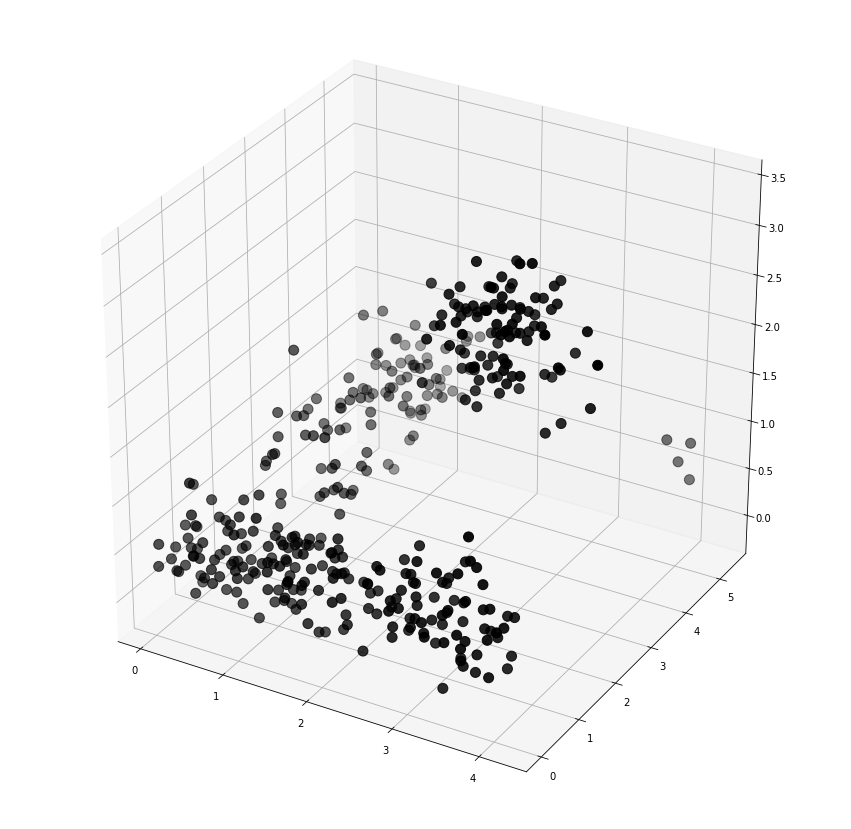

In [321]:
#Plot original dataset
fig = plt.figure(figsize = (15,15))

ax = fig.add_subplot(111, projection='3d')

data2.set_axis(['Index','X1','X2','X3', 'Class'], axis=1, inplace=True)
ax.scatter(data2["X1"],data2["X2"],data2["X3"], c="Black", s=100)

KMEANS CLUSTERING DATASET-2

In [322]:
#KMeans
data2_kmeans=KMeans(n_clusters=4,random_state=42)
data2_kmeans.fit(x_data2)

KMeans(n_clusters=4, random_state=42)

In [323]:
#plotting the cluster according to kmeans and converting as it is in dataset 
data2['pred']=(data2_kmeans.labels_)
data2
#for i in data2_kmeans_plot:
#  final_data2_kmeans=np.where(data2_kmeans_plot==data2_kmeans_plot, data2_kmeans_plot+1, data2_kmeans_plot  )
#print(final_data2_kmeans)

Index        X1        X2        X3  Class  pred
0      X1  3.277701  0.814082  0.326574      0     2
1      X2  0.387577  0.176780  0.888046      0     0
2      X3  0.268546  0.582963  0.080981      0     0
3      X4  2.031145  0.244597  0.643921      0     2
4      X5  0.188677  0.461280  0.496633      0     0
..    ...       ...       ...       ...    ...   ...
399  X400  3.248655  2.297291  3.388138      2     1
400     X  4.100000  5.100000  0.504558      3     3
401   X.1  3.900000  4.900000  0.941634      3     3
402   X.2  4.000000  5.000000  0.702123      3     3
403   X.3  4.100000  5.100000  0.887645      3     3

[404 rows x 6 columns]

In [325]:
#ACCURACY AND F1 SCORE BEFORE MAPPING
print("F1-SCORE")
f1_data2= metrics.f1_score(y_data2, data2.pred, average=None)
print(f1_data2)
print("ACCURACY")
acc_data2=accuracy_score(y_data2,data2.pred)
print(acc_data2)

F1-SCORE
[0.68621701 0.         0.         0.0952381 ]
ACCURACY
0.2995049504950495


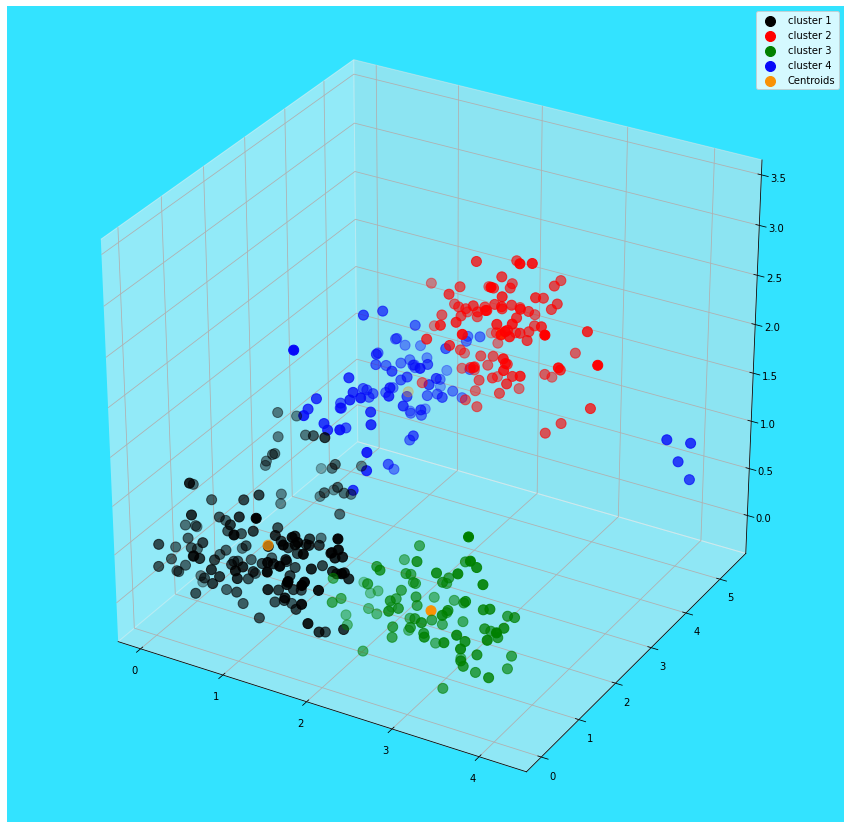

In [326]:
#KMeaans cluster data 3d plot
fig_data2 = plt.figure(figsize = (15,15))

ax2 = fig_data2.add_subplot(111, projection='3d')
ax2.scatter(x_data2[data2.pred==0, 0], x_data2[data2.pred==0, 1],x_data2[data2.pred == 0,2], s=100,  color = 'black', label = "cluster 1")
ax2.scatter(x_data2[data2.pred==1, 0], x_data2[data2.pred==1, 1],x_data2[data2.pred == 1,2], s=100,  color = 'red', label = "cluster 2")
ax2.scatter(x_data2[data2.pred==2, 0], x_data2[data2.pred==2, 1],x_data2[data2.pred == 2,2], s=100,  color = 'green', label = "cluster 3")
ax2.scatter(x_data2[data2.pred==3, 0], x_data2[data2.pred==3, 1],x_data2[data2.pred == 3,2], s=100,  color = '#060AF9', label = "cluster 4")
ax2.scatter(data2_kmeans.cluster_centers_[:, 0], data2_kmeans.cluster_centers_[:,1],data2_kmeans.cluster_centers_[:,2], s = 100, c = '#F99206', label = 'Centroids')
ax2.legend()
ax2.set_facecolor("#33E3FF")
plt.show()

MAPPING STARTED FOR DATASET 2

In [327]:
x=data2_kmeans.cluster_centers_
df2_d2=pd.DataFrame(x,columns=['X1','X2','X3'])
df2_d2.index.name='pred'
df2_d2

X1        X2        X3
pred                              
0     1.011823  0.755302  0.534642
1     2.934853  2.559311  2.551465
2     3.044514  0.511521  0.486630
3     1.153400  4.083016  1.043139

In [328]:
df1_d2=data2[['X1','X2','X3','Class']]
df1_d2=df1_d2.groupby(['Class']).mean()
n=len(df1_d2.index)
df1_d2

X1        X2        X3
Class                              
0      1.858086  0.517830  0.468973
1      0.999166  3.519289  1.023953
2      2.934853  2.559311  2.551465
3      4.025000  5.025000  0.758990

In [329]:
dict_map=dis(df1_d2,df2_d2,n)
dict_map

{0: 0, 1: 3, 2: 1, 3: 3}

In [330]:
data2_map(data2,dict_map,1)

ACCURACY AFTER MAPPING

In [331]:
from sklearn.metrics import *
print(accuracy_score(data2.Class, data2.map_pred))
print(f1_score(data2.Class, data2.map_pred,average=None))

0.7252475247524752
[0.68621701 0.84444444 1.         0.        ]


HIERARCHICAL DATASET-2

In [332]:
data2= pd.read_csv("Data2.csv")
#print(data2)
data2=data2.rename({'X' : 'X1','Y':'X2','C':'X3'}, axis=1)
data2['Class']=data2['Class'].subtract(1)
data2

Unnamed: 0        X1        X2        X3  Class
0           X1  3.277701  0.814082  0.326574      0
1           X2  0.387577  0.176780  0.888046      0
2           X3  0.268546  0.582963  0.080981      0
3           X4  2.031145  0.244597  0.643921      0
4           X5  0.188677  0.461280  0.496633      0
..         ...       ...       ...       ...    ...
399       X400  3.248655  2.297291  3.388138      2
400          X  4.100000  5.100000  0.504558      3
401        X.1  3.900000  4.900000  0.941634      3
402        X.2  4.000000  5.000000  0.702123      3
403        X.3  4.100000  5.100000  0.887645      3

[404 rows x 5 columns]

Unnamed: 0        X1        X2        X3  Class
0           X1  3.277701  0.814082  0.326574      0
1           X2  0.387577  0.176780  0.888046      0
2           X3  0.268546  0.582963  0.080981      0
3           X4  2.031145  0.244597  0.643921      0
4           X5  0.188677  0.461280  0.496633      0
..         ...       ...       ...       ...    ...
399       X400  3.248655  2.297291  3.388138      2
400          X  4.100000  5.100000  0.504558      3
401        X.1  3.900000  4.900000  0.941634      3
402        X.2  4.000000  5.000000  0.702123      3
403        X.3  4.100000  5.100000  0.887645      3

[404 rows x 5 columns]

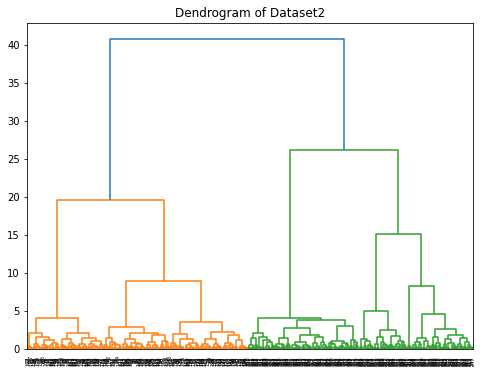

In [333]:
#DENDOGRAM
#data2.drop(data2.columns[[0]], axis=1, inplace=True)
plt.figure(figsize=(8,6))  
plt.title("Dendrogram of Dataset2")
dend2 = shc.dendrogram(shc.linkage(data2.iloc[:,1:4], method='ward'))
data2

In [334]:
data2

Unnamed: 0        X1        X2        X3  Class
0           X1  3.277701  0.814082  0.326574      0
1           X2  0.387577  0.176780  0.888046      0
2           X3  0.268546  0.582963  0.080981      0
3           X4  2.031145  0.244597  0.643921      0
4           X5  0.188677  0.461280  0.496633      0
..         ...       ...       ...       ...    ...
399       X400  3.248655  2.297291  3.388138      2
400          X  4.100000  5.100000  0.504558      3
401        X.1  3.900000  4.900000  0.941634      3
402        X.2  4.000000  5.000000  0.702123      3
403        X.3  4.100000  5.100000  0.887645      3

[404 rows x 5 columns]

In [335]:
data2
data2.iloc[:,1:4]

X1        X2        X3
0    3.277701  0.814082  0.326574
1    0.387577  0.176780  0.888046
2    0.268546  0.582963  0.080981
3    2.031145  0.244597  0.643921
4    0.188677  0.461280  0.496633
..        ...       ...       ...
399  3.248655  2.297291  3.388138
400  4.100000  5.100000  0.504558
401  3.900000  4.900000  0.941634
402  4.000000  5.000000  0.702123
403  4.100000  5.100000  0.887645

[404 rows x 3 columns]

In [336]:
# HIERARCHICAL CLUSTERING
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
a2=cluster.fit_predict(data2.iloc[:,1:4])
data2['pred_hierarchial']=a2

In [337]:
data2['pred_hierarchial'].value_counts()

1    131
0    104
2    100
3     69
Name: pred_hierarchial, dtype: int64

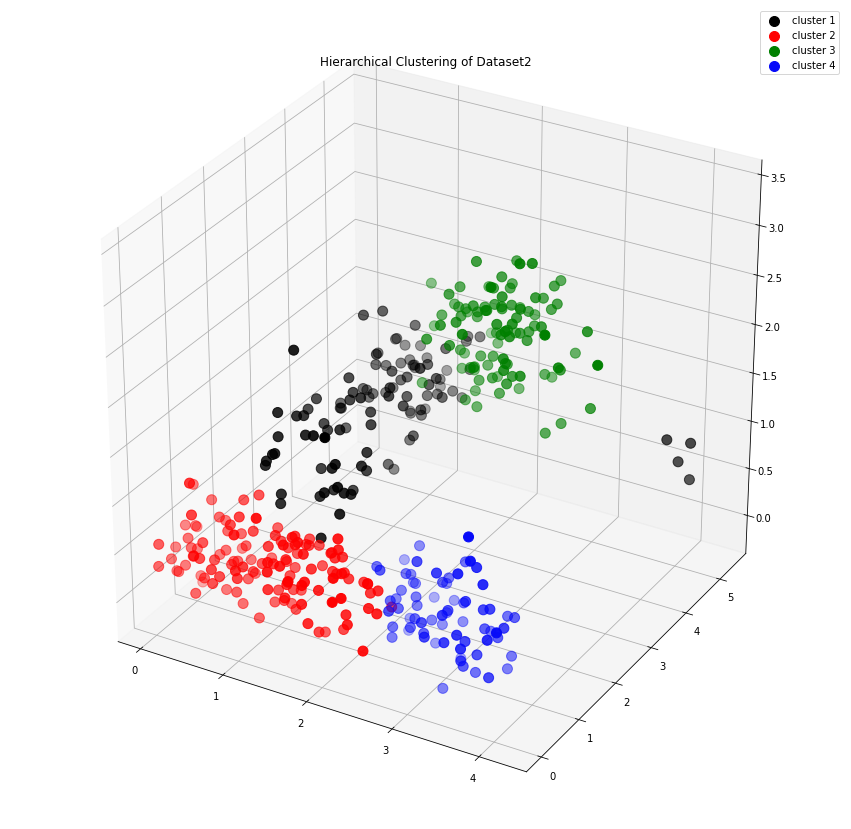

In [479]:
fig_data2 = plt.figure(figsize = (15,15))

ax2 = fig_data2.add_subplot(111, projection='3d')
ax2.scatter(x_data2[a2==0, 0], x_data2[a2==0, 1],x_data2[a2 == 0,2], s=100,  color = 'black', label = "cluster 1")
ax2.scatter(x_data2[a2==1, 0], x_data2[a2==1, 1],x_data2[a2 == 1,2], s=100,  color = 'red', label = "cluster 2")
ax2.scatter(x_data2[a2==2, 0], x_data2[a2==2, 1],x_data2[a2 == 2,2], s=100,  color = 'green', label = "cluster 3")
ax2.scatter(x_data2[a2==3, 0], x_data2[a2==3, 1],x_data2[a2 == 3,2], s=100,  color = '#060AF9', label = "cluster 4")
plt.legend()
plt.title("Hierarchical Clustering of Dataset2")
plt.show()

In [339]:
#accuracy and f1 score OF HIERARCHICAL BEFORE MAPPING
l1=confusion_matrix(data2['Class'],a2)
print(l1)
l2=f1_score(data2['Class'],a2, average='macro')
print(l2)
l3=accuracy_score(data2['Class'],a2)
print(l3)

[[  0 131   0  69]
 [100   0   0   0]
 [  0   0 100   0]
 [  4   0   0   0]]
0.25
0.24752475247524752


MAPPING STARTED

In [341]:
from scipy.cluster.hierarchy import centroid, fcluster
from scipy.spatial.distance import pdist
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
hier_predict = cluster.fit_predict(data2.iloc[:,1:4])
cluster_labels = cluster.labels_
clf = NearestCentroid()
clf.fit(data2.iloc[:,1:4], hier_predict)
#print("Centroids:")
#print(clf.centroids_)
df2_hier=pd.DataFrame(clf.centroids_,columns=['X1','X2','X3'])
df2_hier.index.name='hier_pred'
df2_hier

X1        X2        X3
hier_pred                              
0          1.115545  3.577201  1.013762
1          1.145353  0.521319  0.445109
2          2.934853  2.559311  2.551465
3          3.211244  0.511207  0.514280

In [342]:
df1=data2[['X1','X2','X3','Class']]
df1=df1.groupby(['Class']).mean()
n=len(df1.index)
df1

X1        X2        X3
Class                              
0      1.858086  0.517830  0.468973
1      0.999166  3.519289  1.023953
2      2.934853  2.559311  2.551465
3      4.025000  5.025000  0.758990

In [343]:
dict_map=dis(df1,df2_hier,n)
dict_map

{0: 1, 1: 0, 2: 2, 3: 2}

In [344]:
data2_map(data2,dict_map,2)

ACCURACY AFTER MAPPING

In [345]:
from sklearn.metrics import *
print(accuracy_score(data2.Class, data2.map_pred_hierarchial))
print(f1_score(data2.Class, data2.map_pred_hierarchial,average=None))

0.8193069306930693
[0.79154079 0.98039216 1.         0.        ]


DATASET 3


In [346]:
data3=pd.read_csv('Data3.csv')
data3['Class']=data3['Class'].subtract(1)
data3

Unnamed: 0        X1        X2        X3  Class
0             1  1.295428  0.050829 -0.385217      0
1             2  1.409178 -0.035191 -0.251980      0
2             3  1.096803  0.246365 -0.415011      0
3             4  1.463328  0.265354 -0.513488      0
4             5  1.603284  0.080577 -0.470257      0
..          ...       ...       ...       ...    ...
395         396  0.795695  0.209456  1.880609      3
396         397  0.653127 -0.703156  1.549448      3
397         398 -0.726249 -0.103244  0.694300      3
398         399  0.808596 -0.492640  1.649370      3
399         400  0.749291 -0.447840  0.863555      3

[400 rows x 5 columns]

In [347]:
x_data3=data3.iloc[:,1:4].values
print(x_data3)

[[ 1.295428  0.050829 -0.385217]
 [ 1.409178 -0.035191 -0.25198 ]
 [ 1.096803  0.246365 -0.415011]
 ...
 [-0.726249 -0.103244  0.6943  ]
 [ 0.808596 -0.49264   1.64937 ]
 [ 0.749291 -0.44784   0.863555]]


In [348]:
y_data3= data3.iloc[:,4:5]
print(y_data3)

     Class
0        0
1        0
2        0
3        0
4        0
..     ...
395      3
396      3
397      3
398      3
399      3

[400 rows x 1 columns]


In [ ]:
#Plotting of the original data points

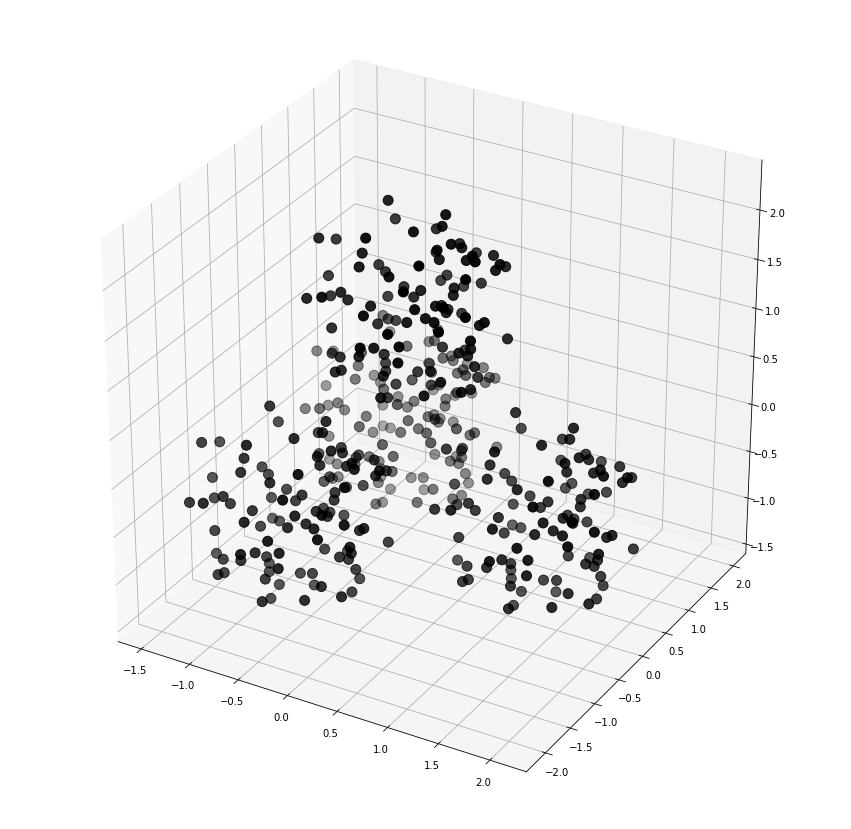

In [349]:
fig = plt.figure(figsize = (15,15))

ax = fig.add_subplot(111, projection='3d')

data3.set_axis(['Index','X1','X2','X3', 'Class'], axis=1, inplace=True)
ax.scatter(data3["X1"],data3["X2"],data3["X3"], c="Black", s=100)

KMEANS DATASET-3

In [350]:
#KMeans
data3_kmeans=KMeans(n_clusters=4,random_state=42)
data3_kmeans.fit(x_data3)

KMeans(n_clusters=4, random_state=42)

In [351]:
#plotting the cluster according to kmeans and converting as it is in dataset 
data3['pred']=(data3_kmeans.labels_)
data3
#for i in data3_kmeans_plot:
 # final_data3_kmeans=np.where(data3_kmeans_plot==data3_kmeans_plot, data3_kmeans_plot+1, data3_kmeans_plot  )
#print(final_data3_kmeans)


Index        X1        X2        X3  Class  pred
0        1  1.295428  0.050829 -0.385217      0     3
1        2  1.409178 -0.035191 -0.251980      0     3
2        3  1.096803  0.246365 -0.415011      0     3
3        4  1.463328  0.265354 -0.513488      0     3
4        5  1.603284  0.080577 -0.470257      0     3
..     ...       ...       ...       ...    ...   ...
395    396  0.795695  0.209456  1.880609      3     1
396    397  0.653127 -0.703156  1.549448      3     1
397    398 -0.726249 -0.103244  0.694300      3     1
398    399  0.808596 -0.492640  1.649370      3     1
399    400  0.749291 -0.447840  0.863555      3     1

[400 rows x 6 columns]

In [352]:
#ACCURACY AND F1 SCORE BEFORE MAPPING
print("F1-SCORE")
f1_data3= metrics.f1_score(y_data3, data3.pred, average=None)
print(f1_data3)
print("ACCURACY")
acc_data3=accuracy_score(y_data3,data3.pred)
print(acc_data3)


F1-SCORE
[0. 0. 1. 0.]
ACCURACY
0.25


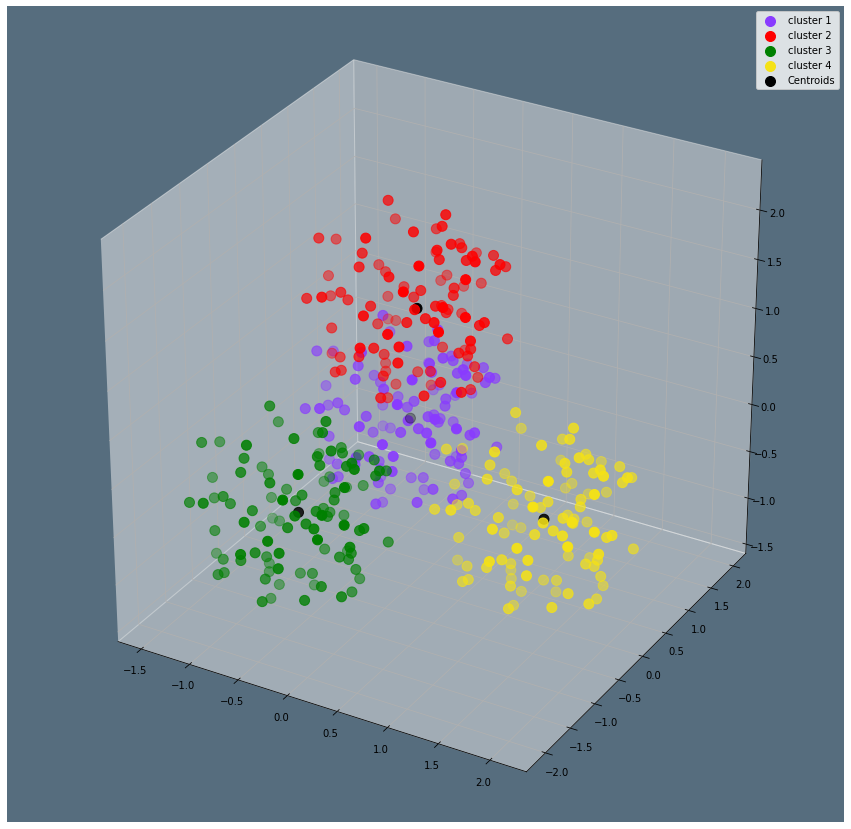

In [362]:
#KMeaans cluster data 3d plot
fig_data3 = plt.figure(figsize = (15,15))

ax3 = fig_data3.add_subplot(111, projection='3d')
ax3.scatter(x_data3[data3.pred==0, 0], x_data3[data3.pred==0, 1],x_data3[data3.pred == 0,2], s=100,  color = '#893BFF', label = "cluster 1")
ax3.scatter(x_data3[data3.pred==1, 0], x_data3[data3.pred==1, 1],x_data3[data3.pred == 1,2], s=100,  color = 'red', label = "cluster 2")
ax3.scatter(x_data3[data3.pred==2, 0], x_data3[data3.pred==2, 1],x_data3[data3.pred == 2,2], s=100,  color = 'green', label = "cluster 3")
ax3.scatter(x_data3[data3.pred==3, 0], x_data3[data3.pred==3, 1],x_data3[data3.pred == 3,2], s=100,  color = '#F5E216', label = "cluster 4")
ax3.scatter(data3_kmeans.cluster_centers_[:, 0], data3_kmeans.cluster_centers_[:,1],data3_kmeans.cluster_centers_[:,2], s = 100, c = 'BLACK', label = 'Centroids')
ax3.legend()
ax3.set_facecolor("#566D7E")
plt.show()

MAPPING START

In [363]:
x=data3_kmeans.cluster_centers_
df2=pd.DataFrame(x,columns=['X1','X2','X3'])
df2.index.name='pred'
df2

X1        X2        X3
pred                              
0    -0.518383  1.034735 -0.425734
1     0.116703 -0.065265  1.370559
2    -0.518383 -1.165265 -0.425734
3     1.386873 -0.065265 -0.425734

In [364]:
df1=data3[['X1','X2','X3','Class']]
df1=df1.groupby(['Class']).mean()
n=len(df1.index)
df1

X1        X2        X3
Class                              
0      1.386873 -0.065265 -0.425734
1     -0.518383  1.034735 -0.425734
2     -0.518383 -1.165265 -0.425734
3      0.116703 -0.065265  1.370559

In [365]:
dict_map=dis(df1,df2,n)
dict_map

{0: 3, 1: 0, 2: 2, 3: 1}

In [366]:
map(data3,dict_map,1)

ACCURACY AFTER MAPPING

In [367]:
from sklearn.metrics import *
print(accuracy_score(data3.Class, data3.map_pred))
print(f1_score(data3.Class, data3.map_pred,average=None))

1.0
[1. 1. 1. 1.]


HIERARCHICAL CLUSTERING DATASET-3

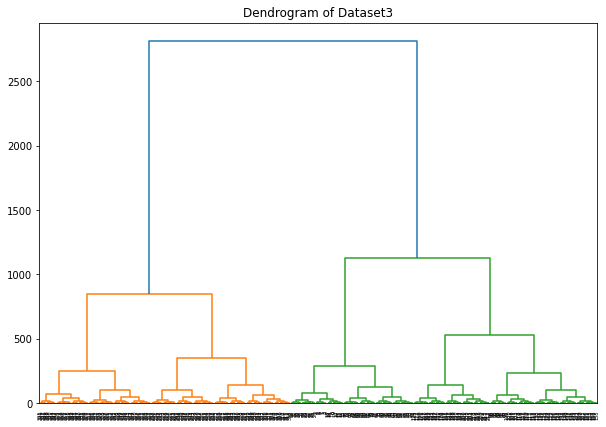

In [368]:
#DENDOGRAM
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram of Dataset3")
dend3 = shc.dendrogram(shc.linkage(data3, method='ward'))

In [391]:
# Hierarchical Cluster
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
data3['pred_hierarchial']=cluster.fit_predict(data3.iloc[:,1:4])
a3=data3['pred_hierarchial']
a3

0      1
1      1
2      1
3      1
4      1
      ..
395    2
396    2
397    2
398    2
399    2
Name: pred_hierarchial, Length: 400, dtype: int64

<Figure size 648x648 with 0 Axes>

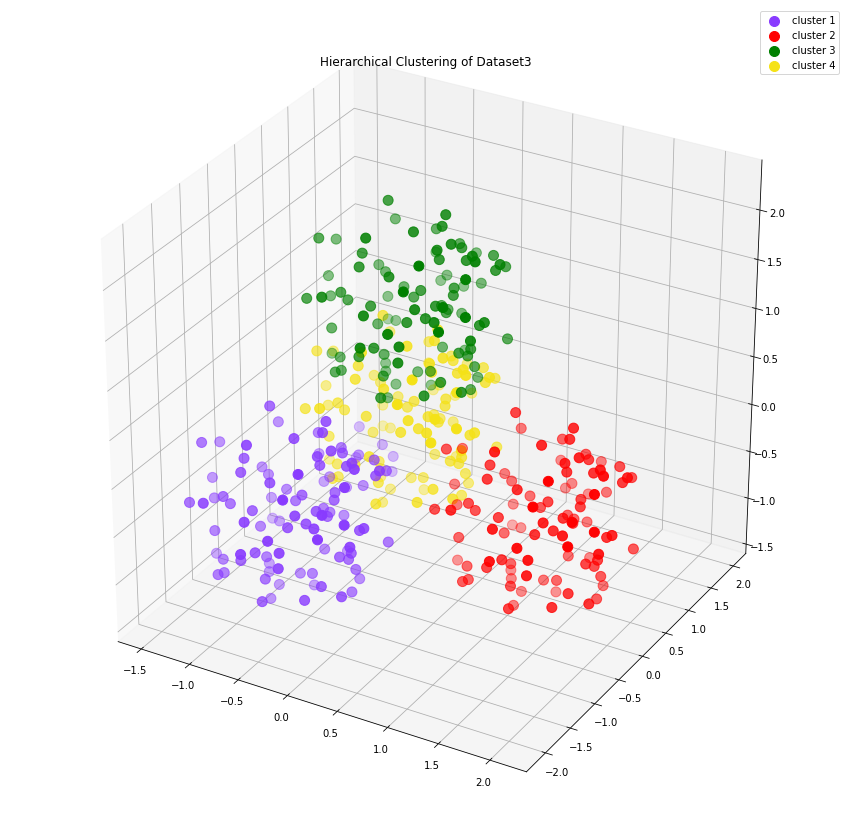

In [393]:
#plot for hierarchical
fig = plt.figure(figsize = (9,9))
#KMeaans cluster data 3d plot
fig_data3 = plt.figure(figsize = (15,15))

ax3 = fig_data3.add_subplot(111, projection='3d')
ax3.scatter(x_data3[a3==0, 0], x_data3[a3==0, 1],x_data3[a3 == 0,2], s=100,  color = '#893BFF', label = "cluster 1")
ax3.scatter(x_data3[a3==1, 0], x_data3[a3==1, 1],x_data3[a3 == 1,2], s=100,  color = 'red', label = "cluster 2")
ax3.scatter(x_data3[a3==2, 0], x_data3[a3==2, 1],x_data3[a3 == 2,2], s=100,  color = 'green', label = "cluster 3")
ax3.scatter(x_data3[a3==3, 0], x_data3[a3==3, 1],x_data3[a3 == 3,2], s=100,  color = '#F5E216', label = "cluster 4")
plt.legend()
plt.title("Hierarchical Clustering of Dataset3")
plt.show()

In [394]:
#accuracy and f1 score before mapping
l1=confusion_matrix(data3['Class'],a3)
print(l1)
l2=f1_score(data3['Class'],a3, average='macro')
print(l2)
l3=accuracy_score(data3['Class'],a3)
print(l3)

[[  0 100   0   0]
 [  5   0   0  95]
 [100   0   0   0]
 [  0   0 100   0]]
0.0
0.0


MAPPING STARTS

In [395]:
from scipy.cluster.hierarchy import centroid, fcluster
from scipy.spatial.distance import pdist
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
hier_predict = cluster.fit_predict(data3.iloc[:,1:4])
cluster_labels = cluster.labels_
clf = NearestCentroid()
clf.fit(data3.iloc[:,1:4], hier_predict)
df2_hier=pd.DataFrame(clf.centroids_,columns=['X1','X2','X3'])
df2_hier.index.name='hier_pred'
df2_hier

X1        X2        X3
hier_pred                              
0         -0.516375 -1.096812 -0.425785
1          1.386873 -0.065265 -0.425734
2          0.116703 -0.065265  1.370559
3         -0.520601  1.074866 -0.425676

In [396]:
df1=data3[['X1','X2','X3','Class']]
df1=df1.groupby(['Class']).mean()
n=len(df1.index)
df1

X1        X2        X3
Class                              
0      1.386873 -0.065265 -0.425734
1     -0.518383  1.034735 -0.425734
2     -0.518383 -1.165265 -0.425734
3      0.116703 -0.065265  1.370559

In [397]:
dict_map=dis(df1,df2_hier,n)
dict_map

{0: 1, 1: 3, 2: 0, 3: 2}

In [398]:
map(data3,dict_map,2)

After mapping accuracy

In [399]:
from sklearn.metrics import *
print(accuracy_score(data3.Class, data3.map_pred_hierarchial))
print(f1_score(data3.Class, data3.map_pred_hierarchial,average=None))

0.9875
[1.         0.97435897 0.97560976 1.        ]


DATASET 4

In [400]:
data4= pd.read_csv('Data4.csv')
print(data4)

     Unnamed: 0       X1      X2       X3  Class
0             1 -0.45300 -0.8910  0.02300      1
1             2  0.65300 -0.8460  0.02110      1
2             3  0.39800  0.9130 -0.00139      1
3             4  0.09520  1.0500  0.00628      1
4             5  0.52400 -0.9410  0.03780      1
..          ...      ...     ...      ...    ...
995         996  0.01520  0.0531 -0.36100      2
996         997  0.05160  0.6910  0.87500      2
997         998 -0.00511  1.3900 -0.94700      2
998         999 -0.06710  0.7140  0.88100      2
999        1000 -0.05770  0.4280 -0.73000      2

[1000 rows x 5 columns]


In [401]:
x_data4= data4.iloc[:,1:4].values
print(x_data4)

[[-0.453   -0.891    0.023  ]
 [ 0.653   -0.846    0.0211 ]
 [ 0.398    0.913   -0.00139]
 ...
 [-0.00511  1.39    -0.947  ]
 [-0.0671   0.714    0.881  ]
 [-0.0577   0.428   -0.73   ]]


In [403]:
y_data4= data4.iloc[:,4:5].values
#print(y_data4)

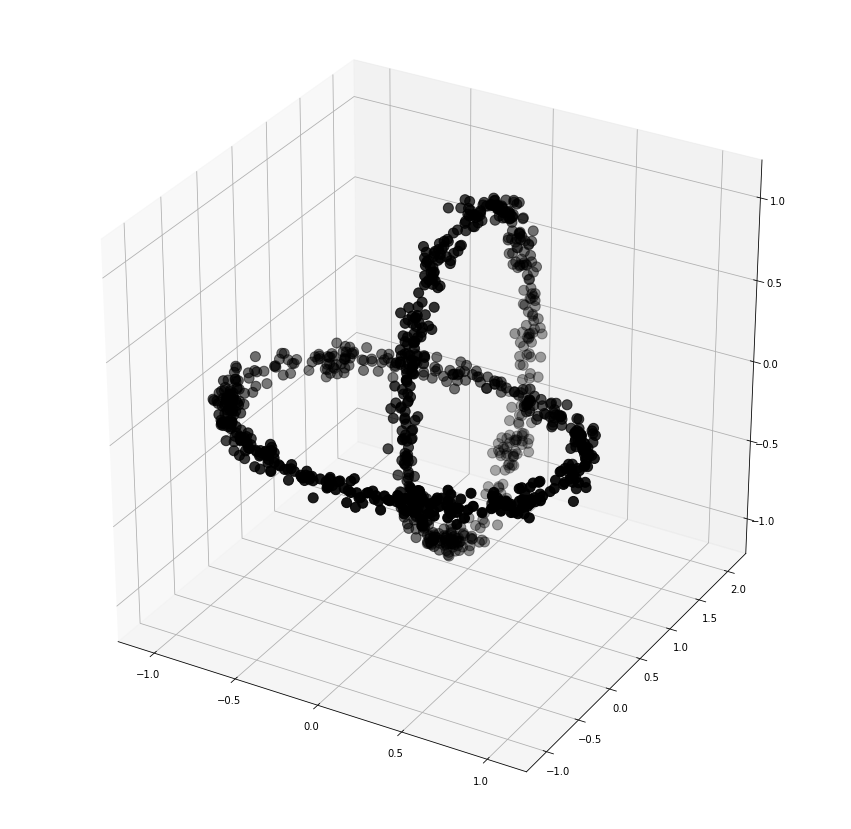

In [404]:
#PLOTTING Original datapoints
fig = plt.figure(figsize = (15,15))

ax = fig.add_subplot(111, projection='3d')

data4.set_axis(['Index','X1','X2','X3', 'Class'], axis=1, inplace=True)
ax.scatter(data4["X1"],data4["X2"],data4["X3"], c="Black", s=100)

KMEANS FOR DATASET-4

In [405]:
#KMeans
data4_kmeans=KMeans(n_clusters=2, random_state=42)
data4_kmeans.fit(x_data4)

KMeans(n_clusters=2, random_state=42)

In [406]:
#classes of all the datapoints after kmeans fit
data4_kmeans_plot=data4_kmeans.labels_
print(data4_kmeans_plot)

[0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1
 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0
 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1
 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1
 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0
 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0
 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0
 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1
 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 

In [407]:
#ACCURACY AND F1 SCORE
print("F1-SCORE")
f1_data4= metrics.f1_score(y_data4, data4_kmeans_plot, average=None)
print(f1_data4)
print("ACCURACY")
acc_data4=accuracy_score(y_data4,data4_kmeans_plot)
print(acc_data4)

F1-SCORE
[0.         0.34634635 0.        ]
ACCURACY
0.173


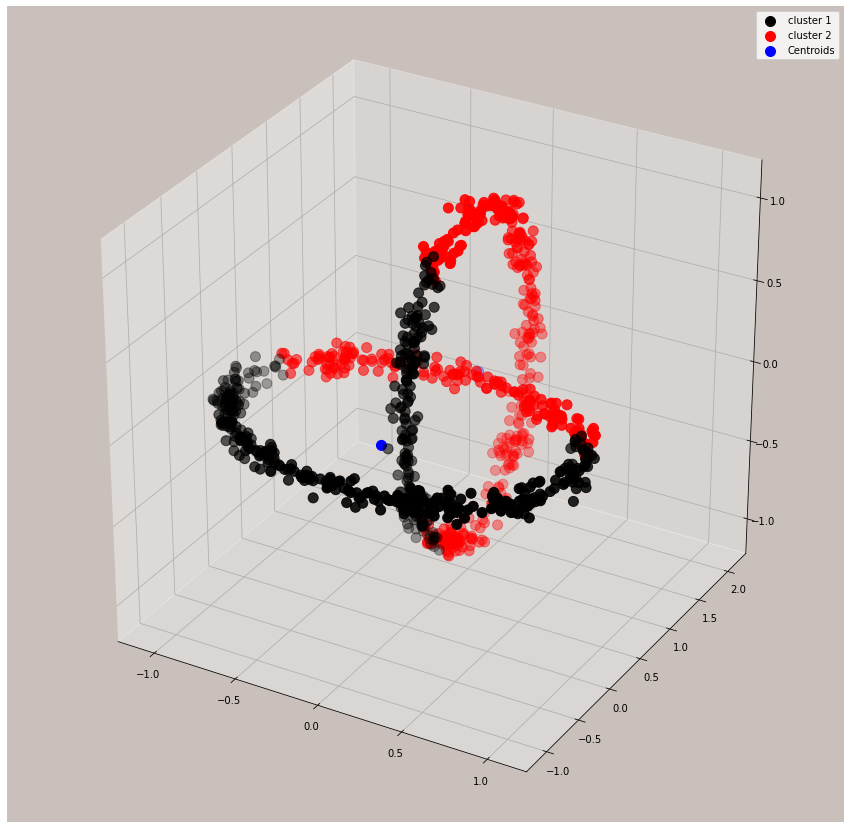

In [408]:
#plotting the 3d clusters 
fig_data4 = plt.figure(figsize = (15,15))

ax4 = fig_data4.add_subplot(111, projection='3d')
ax4.scatter(x_data4[data4_kmeans_plot==0, 0], x_data4[data4_kmeans_plot==0, 1],x_data4[data4_kmeans_plot == 0,2], s=100,  color = 'black', label = "cluster 1")
ax4.scatter(x_data4[data4_kmeans_plot==1, 0], x_data4[data4_kmeans_plot==1, 1],x_data4[data4_kmeans_plot == 1,2], s=100,  color = 'red', label = "cluster 2")
ax4.scatter(data4_kmeans.cluster_centers_[:, 0], data4_kmeans.cluster_centers_[:,1],data4_kmeans.cluster_centers_[:,2], s = 100, c = 'blue', label = 'Centroids')

ax4.legend()
ax4.set_facecolor("#C9C0BB")
plt.show()

HIERARCHICAL FOR DATASET-4

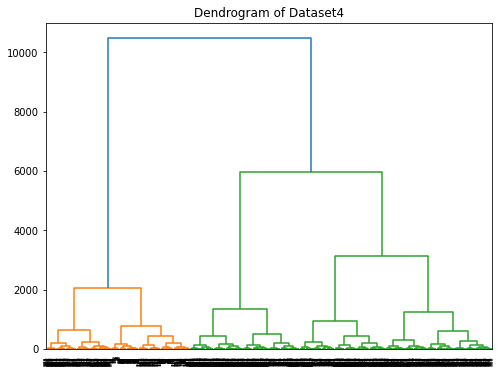

In [409]:
#Dendogram
plt.figure(figsize=(8,6))  
plt.title("Dendrogram of Dataset4")
dend4 = shc.dendrogram(shc.linkage(data4, method='ward'))

In [415]:
#Cluster 
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
a4=cluster.fit_predict(x_data4)
data4['pred_hierarchial']=a4
a4

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,

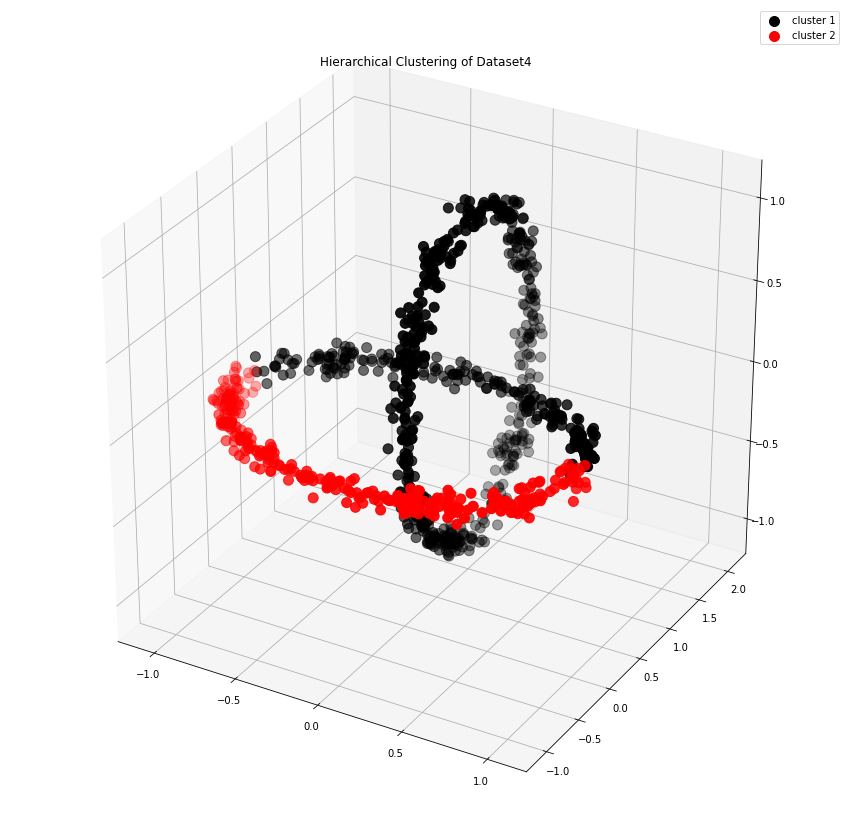

In [414]:
#plot
fig_data4 = plt.figure(figsize = (15,15))

ax4 = fig_data4.add_subplot(111, projection='3d')
ax4.scatter(x_data4[a4==0, 0], x_data4[a4==0, 1],x_data4[a4 == 0,2], s=100,  color = 'black', label = "cluster 1")
ax4.scatter(x_data4[a4==1, 0], x_data4[a4==1, 1],x_data4[a4 == 1,2], s=100,  color = 'red', label = "cluster 2")
#ax4.scatter(data4_kmeans.cluster_centers_[:, 0], data4_kmeans.cluster_centers_[:,1],data4_kmeans.cluster_centers_[:,2], s = 100, c = 'blue', label = 'Centroids')
plt.legend()
plt.title("Hierarchical Clustering of Dataset4")
plt.show()

In [416]:
#accuracy and f1 score hierarchical
l1=confusion_matrix(data4['Class'],a4)
print(l1)
l2=f1_score(data4['Class'],a4, average='macro')
print(l2)
l3=accuracy_score(data4['Class'],a4)
print(l3)

[[  0   0   0]
 [201 299   0]
 [500   0   0]]
0.24947851481017938
0.299


DATASET 5

In [417]:
data5=pd.read_csv('Data5.csv')
data5.head()

Unnamed: 0         X1         X2         X3  Class
0           1  -4.822490 -50.402170   4.020861      1
1           2 -44.460120  20.964670 -11.492060      1
2           3  50.001020   0.780748   9.134460      1
3           4 -41.699080 -22.310060  16.314120      1
4           5   4.425242  -4.666664  50.223740      1

In [418]:
x_data5=data5.iloc[:,1:4].values
#x_data5.head()

In [419]:
y_data5=data5.iloc[:,4:5].values
#y_data5.head()

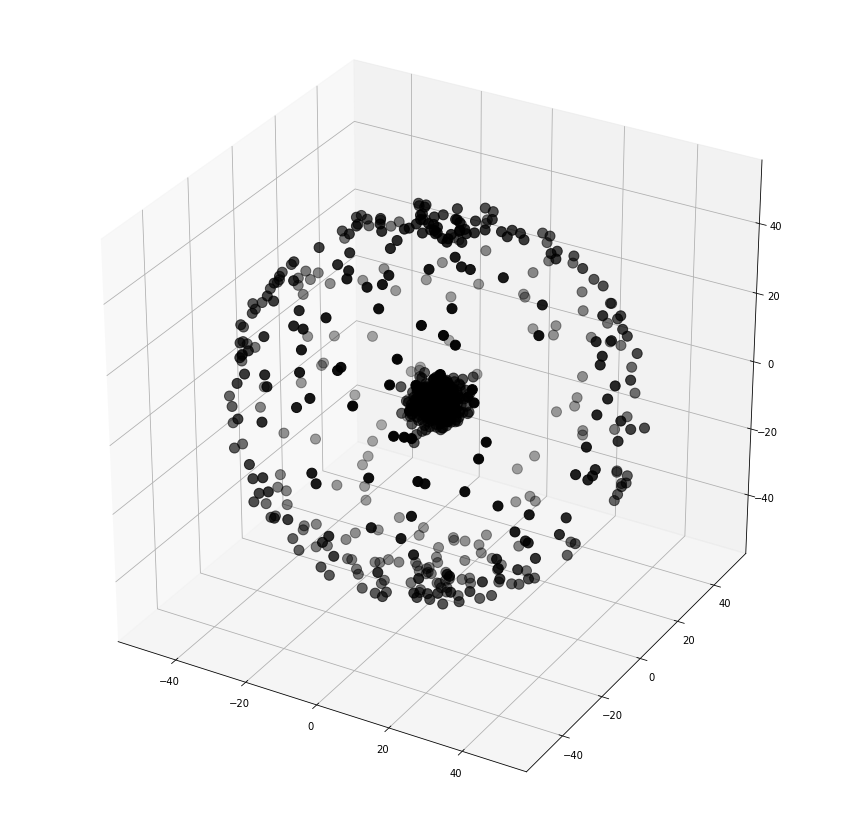

In [420]:
#PLOTTING Original datapoints
fig = plt.figure(figsize = (15,15))

ax = fig.add_subplot(111, projection='3d')

data5.set_axis(['Index','X1','X2','X3','Class'], axis=1, inplace=True)
ax.scatter(data5["X1"],data5["X2"], data5["X3"] ,c="Black", s=100)

KMEANS FOR DATASET-5

In [421]:
#KMeans
data5_kmeans=KMeans(n_clusters=2, random_state=42)
data5_kmeans.fit(x_data5)

KMeans(n_clusters=2, random_state=42)

In [422]:
data5_kmeans_plot=data5_kmeans.labels_
print(data5_kmeans_plot)

[0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0
 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1
 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0
 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1
 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1
 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1
 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1
 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0
 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [423]:
#ACCURACY AND F1 SCORE 
print("F1-SCORE")
f1_data5= metrics.f1_score(y_data5, data5_kmeans_plot, average=None)
print(f1_data5)
print("ACCURACY")
acc_data5=accuracy_score(y_data5,data5_kmeans_plot)
print(acc_data5)

F1-SCORE
[0.         0.60627178 0.        ]
ACCURACY
0.2175


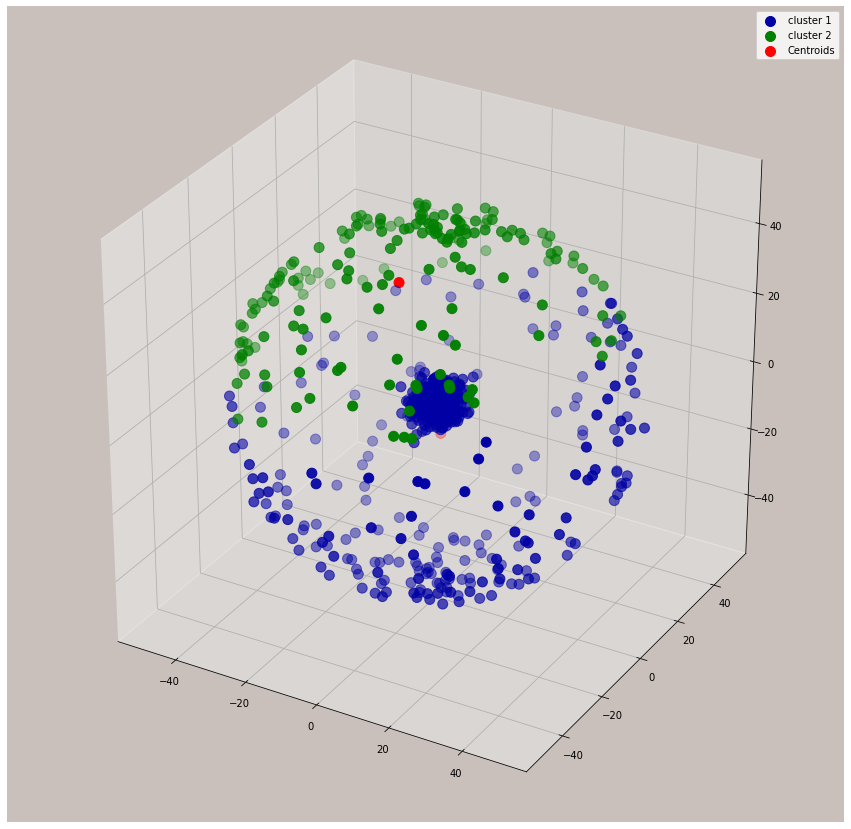

In [424]:
# plotting the 3d clusters for dataste 5
fig_data5 = plt.figure(figsize = (15,15))

ax5 = fig_data5.add_subplot(111, projection='3d')
ax5.scatter(x_data5[data5_kmeans_plot==0, 0], x_data5[data5_kmeans_plot==0, 1],x_data5[data5_kmeans_plot == 0,2], s=100,  color = '#0000A5', label = "cluster 1")
ax5.scatter(x_data5[data5_kmeans_plot==1, 0], x_data5[data5_kmeans_plot==1, 1],x_data5[data5_kmeans_plot == 1,2], s=100,  color = 'green', label = "cluster 2")
ax5.scatter(data5_kmeans.cluster_centers_[:, 0], data5_kmeans.cluster_centers_[:,1],data5_kmeans.cluster_centers_[:,2], s = 100, c = 'RED', label = 'Centroids')
ax5.legend()
ax5.set_facecolor("#C9C0BB")
plt.show()

HIERARCHICAL FOR DATASET-5

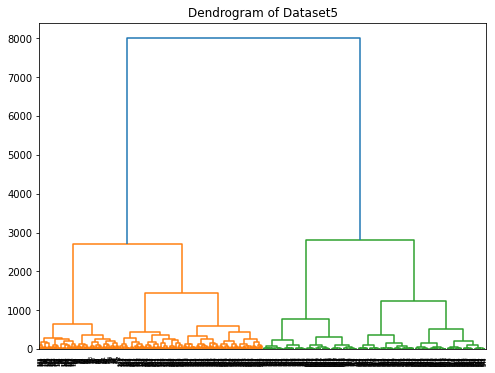

In [425]:
#Dendogram
plt.figure(figsize=(8,6))  
plt.title("Dendrogram of Dataset5")
dend5 = shc.dendrogram(shc.linkage(data5, method='ward'))

In [428]:
#cluster
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
a5=cluster.fit_predict(x_data5)
data5['pred_hierarchial']=a5

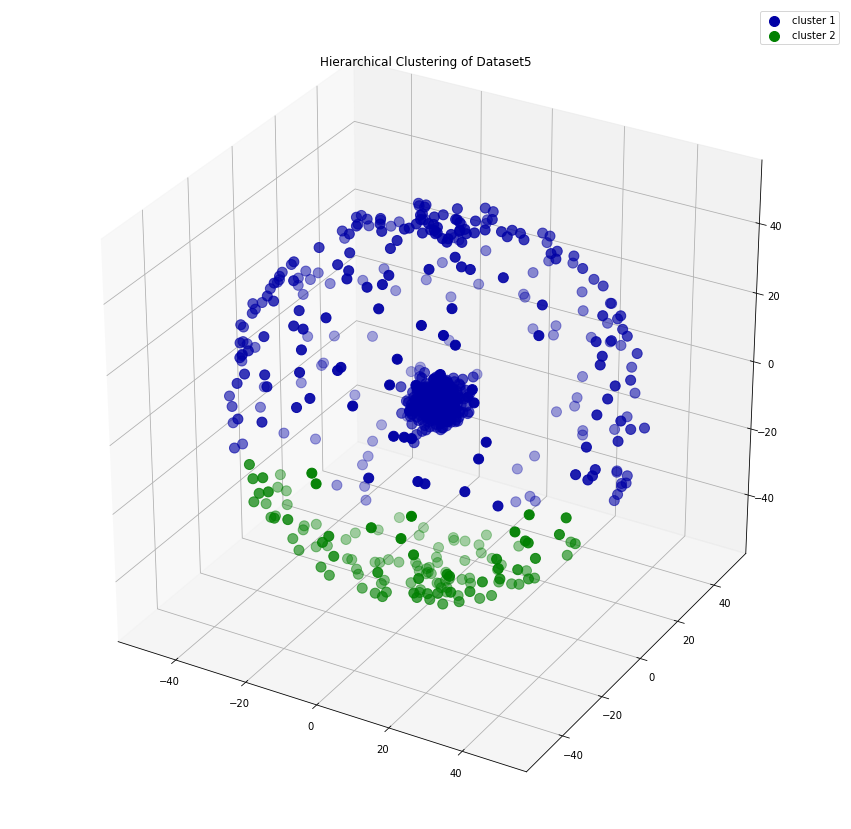

In [430]:
#plot
fig_data5 = plt.figure(figsize = (15,15))

ax5 = fig_data5.add_subplot(111, projection='3d')
ax5.scatter(x_data5[a5==0, 0], x_data5[a5==0, 1],x_data5[a5 == 0,2], s=100,  color = '#0000A5', label = "cluster 1")
ax5.scatter(x_data5[a5==1, 0], x_data5[a5==1, 1],x_data5[a5 == 1,2], s=100,  color = 'green', label = "cluster 2")
plt.legend()
plt.title("Hierarchical Clustering of Dataset5")
plt.show()

In [431]:
l1=confusion_matrix(data5['Class'],a5)
print(l1)
l2=f1_score(data5['Class'],a5, average='macro')
print(l2)
l3=accuracy_score(data5['Class'],a5)
print(l3)

[[  0   0   0]
 [274 126   0]
 [400   0   0]]
0.1596958174904943
0.1575


DATASET 6

In [432]:
Data6=pd.read_csv("Data6.csv")
Data6.head()

Unnamed: 0        X1        X2  Class
0           1  1.388261  2.076096      1
1           2  2.177247  3.102304      1
2           3  0.378645  5.307610      1
3           4  3.681732  1.622681      1
4           5  2.462861  2.777897      1

In [433]:
x_data6=Data6.iloc[:,1:3].values
#x_data6.head()

In [434]:
y_data6=Data6.iloc[:,3:4].values
#y_data6.head()

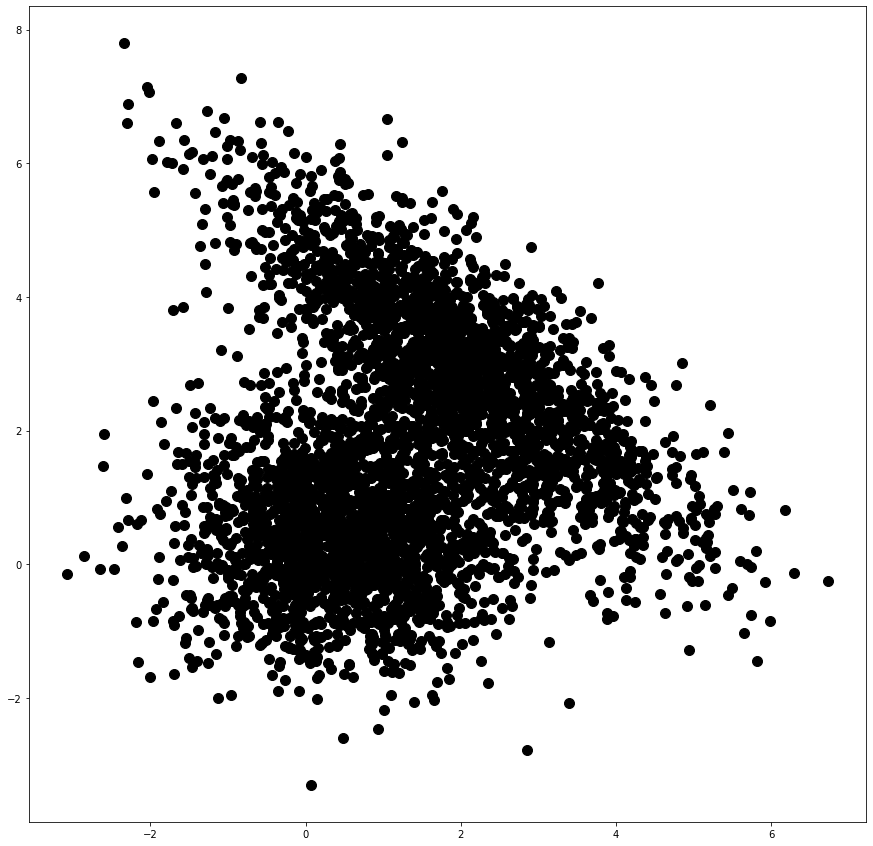

In [435]:
#PLOTTING Original datapoints
fig = plt.figure(figsize = (15,15))

ax = fig.add_subplot(111)

Data6.set_axis(['Index','X1','X2','Class'], axis=1, inplace=True)
ax.scatter(Data6["X1"],Data6["X2"] ,c="Black", s=100)
plt.show()

KMEANS DATASTE-6

In [436]:
#KMeans
data6_kmeans=KMeans(n_clusters=2, random_state=42)
data6_kmeans.fit(x_data6)

KMeans(n_clusters=2, random_state=42)

In [437]:
data6_kmeans_plot=data6_kmeans.labels_
print(data5_kmeans_plot)

[0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0
 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1
 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0
 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1
 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1
 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1
 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1
 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0
 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [438]:
#ACCURACY AND F1 SCORE
print("F1-SCORE")
f1_data6= metrics.f1_score(y_data6, data6_kmeans_plot, average=None)
print(f1_data6)
print("ACCURACY")
acc_data6=accuracy_score(y_data6,data6_kmeans_plot)
print(acc_data6)

F1-SCORE
[0.         0.02306342 0.        ]
ACCURACY
0.01123046875


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


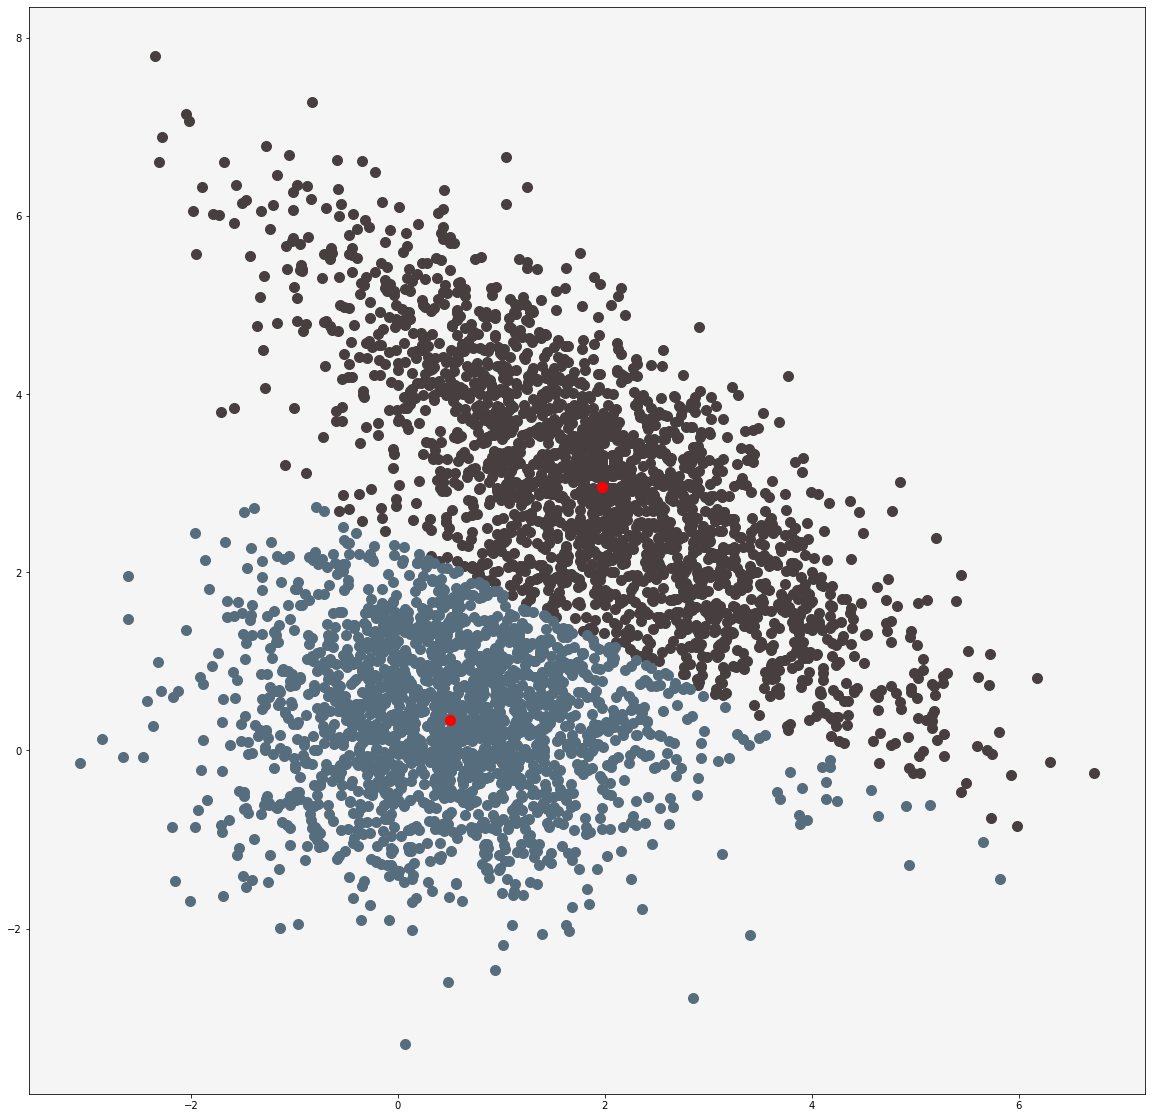

In [439]:
# plotting the 3d clusters for dataste 6
fig_data6 = plt.figure(figsize = (20,20))

#ax6 = fig_data6.add_subplot(111, projection='2d')
plt.scatter(x_data6[data6_kmeans_plot==0, 0], x_data6[data6_kmeans_plot==0, 1], s=100,  color = '#463E3F', label = "cluster 1")
plt.scatter(x_data6[data6_kmeans_plot==1, 0], x_data6[data6_kmeans_plot==1, 1], s=100,  color = '#566D7E', label = "cluster 2")
plt.scatter(data6_kmeans.cluster_centers_[:, 0], data6_kmeans.cluster_centers_[:,1], s = 100, c = 'RED', label = 'Centroids')
ax6=plt.axes()
ax6.set_facecolor("#F5F5F5")
plt.show()

HIERARCHICAL DATASET6

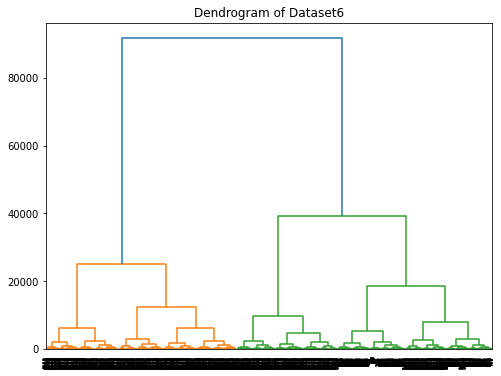

In [440]:
#Dendogram
plt.figure(figsize=(8,6))  
plt.title("Dendrogram of Dataset6")
dend6 = shc.dendrogram(shc.linkage(Data6, method='ward'))

In [441]:
#cluster
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
a6=cluster.fit_predict(Data6.iloc[:,1:4])
Data6['pred_hierarchial']=a6

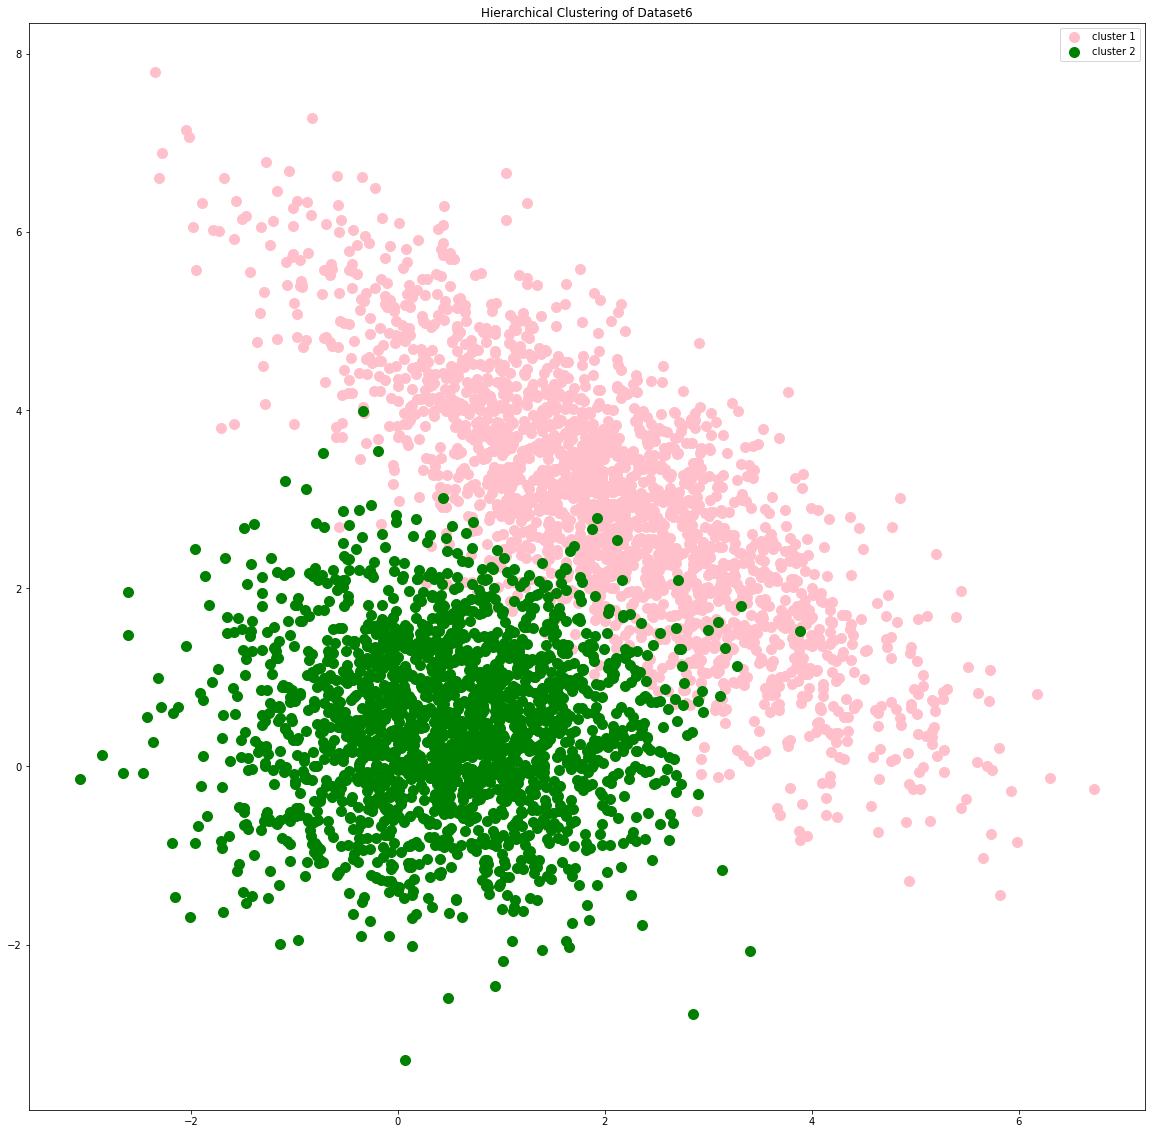

In [445]:
#plot
fig_data6 = plt.figure(figsize = (20,20))

plt.scatter(x_data6[a6==0, 0], x_data6[a6==0, 1], s=100,  color = 'pink', label = "cluster 1")
plt.scatter(x_data6[a6==1, 0], x_data6[a6==1, 1], s=100,  color = 'green', label = "cluster 2")
plt.legend()
plt.title("Hierarchical Clustering of Dataset6")
plt.show()

In [446]:
#ACCURACY AND F1 SCORE OF HIERACHICAL
l1=confusion_matrix(Data6['Class'],a6)
print(l1)
l2=f1_score(Data6['Class'],a6, average='macro')
print(l2)
l3=accuracy_score(Data6['Class'],a6)
print(l3)

[[   0    0    0]
 [2046    2    0]
 [  19 2029    0]]
0.00032687750265587975
0.00048828125


DATASET 7

In [447]:
Data7=pd.read_csv("Data7.csv")
Data7.head()

Unnamed: 0        X1        X2  Class
0           1 -3.000000 -3.000000      5
1           2 -3.000000  3.000000      4
2           3  3.000000 -3.000000      6
3           4  3.000000  3.000000      3
4           5 -0.417091  0.114782      1

In [448]:
x_data7=Data7.iloc[:,1:3].values

In [449]:
y_data7=Data7.iloc[:,3:4].values

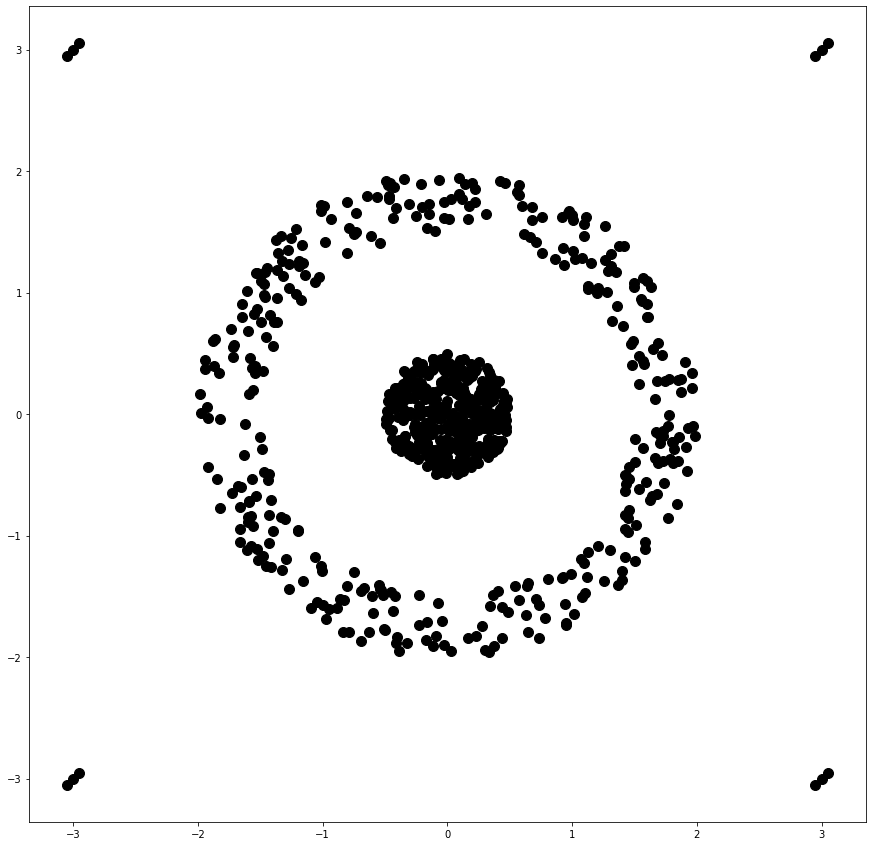

In [450]:
#PLOTTING Original datapoints
fig = plt.figure(figsize = (15,15))

ax = fig.add_subplot(111)

Data7.set_axis(['Index','X1','X2','Class'], axis=1, inplace=True)
ax.scatter(Data7["X1"],Data7["X2"] ,c="Black", s=100)
plt.show()

KMEANS DATASET-7

In [451]:
#KMeans
data7_kmeans=KMeans(n_clusters=6, random_state=42)
data7_kmeans.fit(x_data7)

KMeans(n_clusters=6, random_state=42)

In [452]:
#CLUSTERS
data7_kmeans_plot=data7_kmeans.labels_
print(data7_kmeans_plot)

[3 0 5 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 0 5 4 3 0 5 5
 3 0 3 2 3 2 3 5 0 2 0 3 0 3 2 0 0 0 2 0 5 0 0 4 0 5 3 0 0 2 5 0 3 0 4 3 0
 2 3 4 3 5 2 0 4 2 4 5 4 2 4 0 4 4 2 3 5 3 5 5 4 5 0 3 2 2 2 4 5 2 4 0 0 0
 3 0 0 2 0 0 0 0 2 4 5 0 

In [453]:
#ACCURACY AND F1 SCORE
print("F1-SCORE")
f1_data7= metrics.f1_score(y_data7, data7_kmeans_plot, average=None)
print(f1_data7)
print("ACCURACY")
acc_data7=accuracy_score(y_data7,data7_kmeans_plot)
print(acc_data7)

F1-SCORE
[0.         1.         0.32718894 0.         0.         0.
 0.        ]
ACCURACY
0.6051948051948052


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


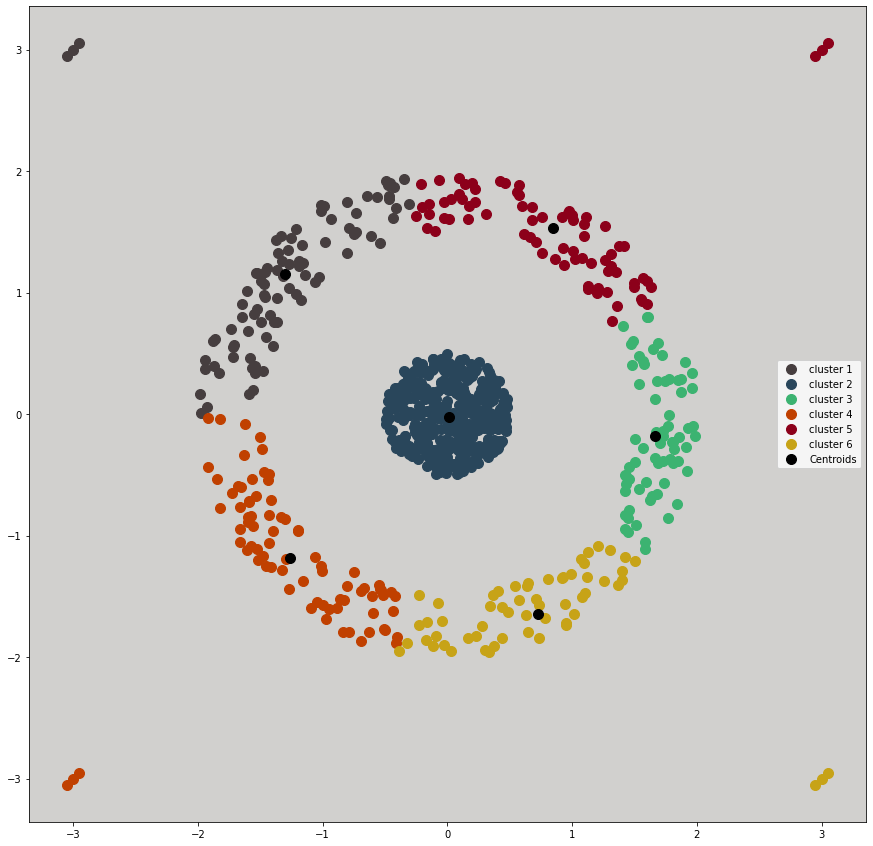

In [454]:
# plotting the 3d clusters for dataste 7
fig_data6 = plt.figure(figsize = (15,15))

#ax6 = fig_data6.add_subplot(111, projection='2d')
plt.scatter(x_data7[data7_kmeans_plot==0, 0], x_data7[data7_kmeans_plot==0, 1], s=100,  color = '#463E3F', label = "cluster 1")
plt.scatter(x_data7[data7_kmeans_plot==1, 0], x_data7[data7_kmeans_plot==1, 1], s=100,  color = '#29465B', label = "cluster 2")
plt.scatter(x_data7[data7_kmeans_plot==2, 0], x_data7[data7_kmeans_plot==2, 1], s=100,  color = '#3CB371', label = "cluster 3")
plt.scatter(x_data7[data7_kmeans_plot==3, 0], x_data7[data7_kmeans_plot==3, 1], s=100,  color = '#C04000', label = "cluster 4")
plt.scatter(x_data7[data7_kmeans_plot==4, 0], x_data7[data7_kmeans_plot==4, 1], s=100,  color = '#8C001A', label = "cluster 5")
plt.scatter(x_data7[data7_kmeans_plot==5, 0], x_data7[data7_kmeans_plot==5, 1], s=100,  color = '#C7A317', label = "cluster 6")
plt.scatter(data7_kmeans.cluster_centers_[:, 0], data7_kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

plt.legend()
ax7=plt.axes()
ax7.set_facecolor("#D1D0CE")
plt.show()

HIERARCHICAL DATASET-7

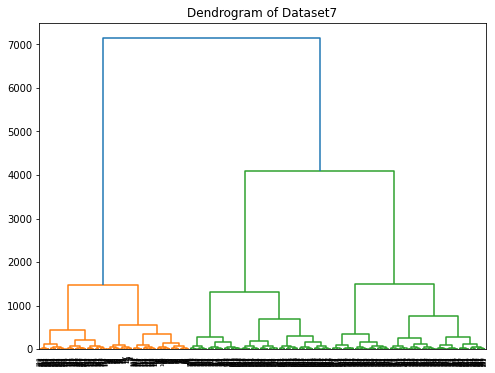

In [455]:
#DENDOGRAM
plt.figure(figsize=(8,6))  
plt.title("Dendrogram of Dataset7")
dend7 = shc.dendrogram(shc.linkage(Data7, method='ward'))

In [456]:
#clusters
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
a7=cluster.fit_predict(Data7.iloc[:,1:4])
Data7['pred_hierarchial']=a7

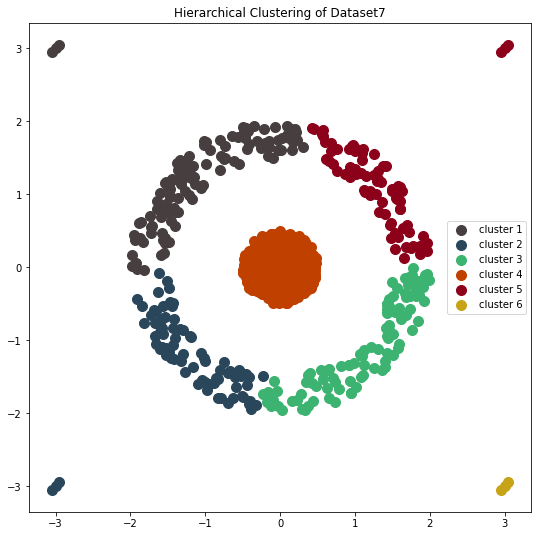

In [458]:
#plot
fig = plt.figure(figsize = (9,9))
plt.scatter(x_data7[a7==0, 0], x_data7[a7==0, 1], s=100,  color = '#463E3F', label = "cluster 1")
plt.scatter(x_data7[a7==1, 0], x_data7[a7==1, 1], s=100,  color = '#29465B', label = "cluster 2")
plt.scatter(x_data7[a7==2, 0], x_data7[a7==2, 1], s=100,  color = '#3CB371', label = "cluster 3")
plt.scatter(x_data7[a7==3, 0], x_data7[a7==3, 1], s=100,  color = '#C04000', label = "cluster 4")
plt.scatter(x_data7[a7==4, 0], x_data7[a7==4, 1], s=100,  color = '#8C001A', label = "cluster 5")
plt.scatter(x_data7[a7==5, 0], x_data7[a7==5, 1], s=100,  color = '#C7A317', label = "cluster 6")
plt.legend()
plt.title("Hierarchical Clustering of Dataset7")
plt.show()

In [459]:
#accuracy and f1 score hierarchical
l1=confusion_matrix(Data7['Class'],a7)
print(l1)
l2=f1_score(Data7['Class'],a7, average='macro')
print(l2)
l3=accuracy_score(Data7['Class'],a7)
print(l3)

[[  0   0   0   0   0   0   0]
 [  0   0   0 395   0   0   0]
 [110  78 101   0  74   0   0]
 [  0   0   0   0   3   0   0]
 [  3   0   0   0   0   0   0]
 [  0   3   0   0   0   0   0]
 [  0   0   0   0   0   3   0]]
0.06219211822660098
0.13116883116883116


DATASET 8

In [460]:
Data8=pd.read_csv("Data8.csv")
Data8.head()

Unnamed: 0        X1        X2       X3  Class
0           1  0.000000  0.000000  1.00000      1
1           2  0.000000  0.052336  0.99863      1
2           3  0.049774  0.016173  0.99863      1
3           4  0.030762 -0.042341  0.99863      1
4           5 -0.030762 -0.042341  0.99863      1

In [461]:
x_data8=Data8.iloc[:,1:4].values

In [462]:
y_data8=Data8.iloc[:,4:5].values

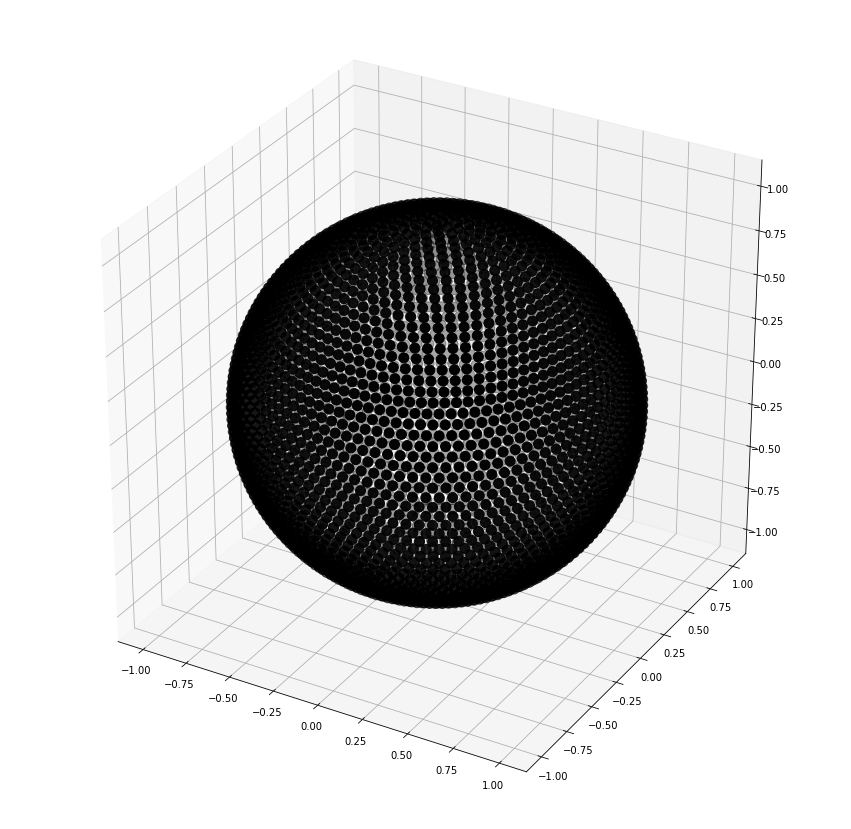

In [463]:
#PLOTTING Original datapoints
fig = plt.figure(figsize = (15,15))

ax = fig.add_subplot(111, projection='3d')

Data8.set_axis(['Index','X1','X2','X3','Class'], axis=1, inplace=True)
ax.scatter(Data8["X1"],Data8["X2"], Data8["X3"] ,c="Black", s=100)

KMEANS DATASET8

In [464]:
#KMeans
data8_kmeans=KMeans(n_clusters=1, random_state=42)
data8_kmeans.fit(x_data8)

KMeans(n_clusters=1, random_state=42)

In [465]:
# CLASS OF EACH CLUSTER
data8_kmeans_plot=data8_kmeans.labels_
print(data8_kmeans_plot)
for i in data8_kmeans_plot:
  final_data8_kmeans=np.where(data8_kmeans_plot==data8_kmeans_plot, data8_kmeans_plot+1, data8_kmeans_plot  )
print(final_data8_kmeans)

[0 0 0 ... 0 0 0]
[1 1 1 ... 1 1 1]


In [466]:
#ACCURACY AND F1 SCORE
print("F1-SCORE")
f1_data8= metrics.f1_score(y_data8, final_data8_kmeans, average=None)
print(f1_data8)
print("ACCURACY")
acc_data8=accuracy_score(y_data8,final_data8_kmeans)
print(acc_data8)

F1-SCORE
[1.]
ACCURACY
1.0


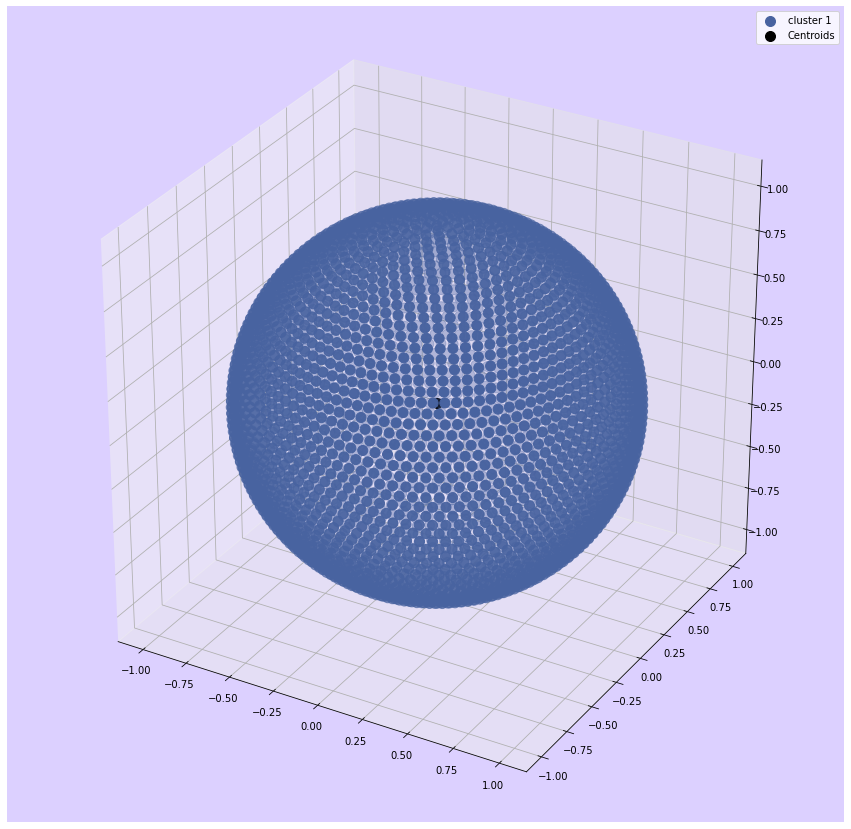

In [467]:
# plotting the 3d clusters for dataste 8
fig_data5 = plt.figure(figsize = (15,15))

ax5 = fig_data5.add_subplot(111, projection='3d')
ax5.scatter(x_data8[data8_kmeans_plot==0, 0], x_data8[data8_kmeans_plot==0, 1],x_data8[data8_kmeans_plot == 0,2], s=100,  color = '#4863A0', label = "cluster 1")
ax5.scatter(data8_kmeans.cluster_centers_[:, 0], data8_kmeans.cluster_centers_[:,1],data8_kmeans.cluster_centers_[:,2], s = 100, c = 'black', label = 'Centroids')

ax5.set_facecolor("#DCD0FF")
ax5.legend()
plt.show()

HIERARCHICAL DATASET-8

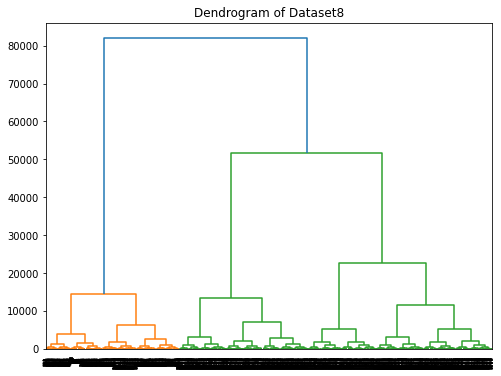

In [468]:
#DENDOGRAM
plt.figure(figsize=(8,6))  
plt.title("Dendrogram of Dataset8")
dend8 = shc.dendrogram(shc.linkage(Data8, method='ward'))

In [469]:
#clusters
cluster = AgglomerativeClustering(n_clusters=1, affinity='euclidean', linkage='ward')  
a8=cluster.fit_predict(Data8.iloc[:,1:4])
Data8['pred_hierarchial']=a8

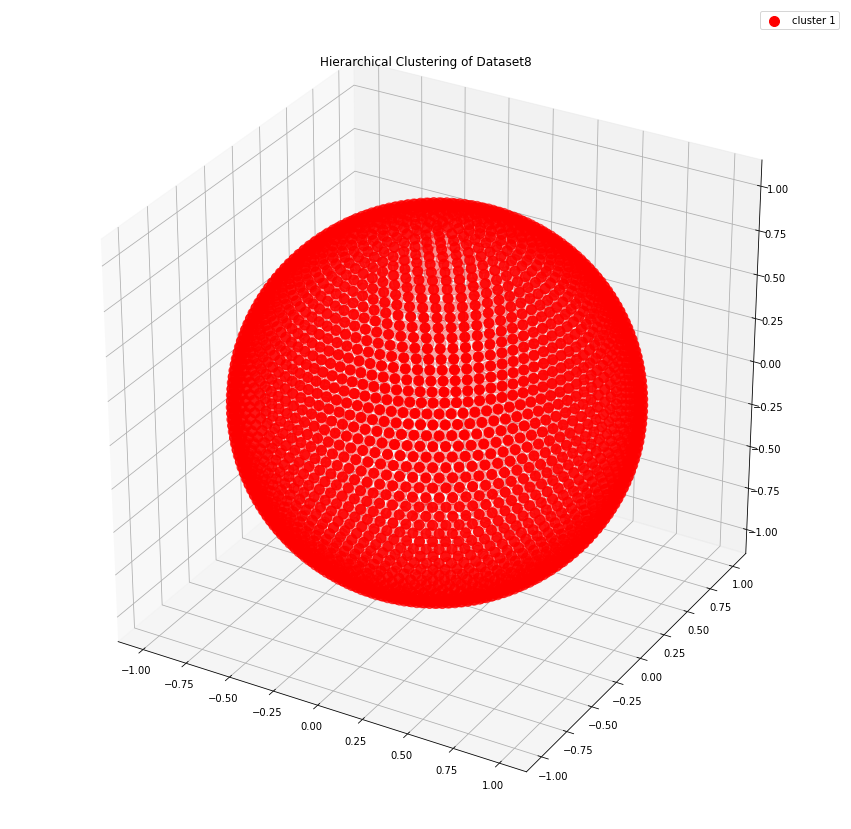

In [471]:
#plot
fig_data5 = plt.figure(figsize = (15,15))

ax5 = fig_data5.add_subplot(111, projection='3d')
ax5.scatter(x_data8[a8==0, 0], x_data8[a8==0, 1],x_data8[a8 == 0,2], s=100,  color = 'red', label = "cluster 1")
plt.legend()
plt.title("Hierarchical Clustering of Dataset8")
plt.show()

In [472]:
#Accuracy and F1 score
l1=confusion_matrix(Data8['Class'],a8)
print(l1)
l2=f1_score(Data8['Class'],a8, average='macro')
print(l2)
l3=accuracy_score(Data8['Class'],a8)
print(l3)

[[   0    0]
 [4002    0]]
0.0
0.0


B) World Indicators

In [480]:
!pip install validclust

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [481]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from validclust import dunn
from sklearn import metrics


In [482]:
#importing the dataset as a dataframe
world_indicators_df=pd.read_csv("World Indicators.csv")

In [483]:
#removing columns
x=world_indicators_df.drop(['Energy Usage','Lending Interest'], axis=1)

#removing rows with missing values
x1=x.dropna(axis=0)

#removing "%" and "$" sign from the columns 
x1["Business Tax Rate"] = [x.strip('%') for x in x1["Business Tax Rate"]]
x1["GDP"] = [x.strip('$') for x in x1["GDP"]]
x1["Health Exp/Capita"]=[x.strip('$') for x in x1["Health Exp/Capita"]]

# removing categorical data which wont be used in clustering
world_indicators_final=x1.iloc[:,0:16]

#world_indicators_final['GDP'] = pd.to_numeric(world_indicators_final['GDP'], errors='coerce')
world_indicators_final['GDP']= world_indicators_final['GDP'].str.replace(',', '').astype(int)
world_indicators_final['Health Exp/Capita']= world_indicators_final['Health Exp/Capita'].str.replace(',', '').astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [484]:
print(world_indicators_final)

     Birth Rate Business Tax Rate  Days to Start Business             GDP  \
0         0.025              72.0                    25.0    199070864638   
1         0.046              52.1                    66.0    104115863405   
2         0.037              65.9                    29.0      7294900431   
3         0.024              19.5                    60.0     15292424757   
4         0.042              43.5                    13.0     10395757480   
..          ...               ...                     ...             ...   
201       0.018              27.9                   694.0      4363219094   
202       0.015              29.1                    41.0     23676348287   
204       0.013              46.5                     5.0  15533800000000   
205       0.015              41.9                     7.0     47236710623   
206       0.020              62.8                   141.0    316482176579   

     Health Exp % GDP  Health Exp/Capita  Hours to do Tax  \
0             

In [485]:
#feature scaling
scaler= MinMaxScaler()
world_indicators_final1=scaler.fit_transform(world_indicators_final)
world_indicators_final1=pd.DataFrame(world_indicators_final1,columns = world_indicators_final.columns)


In [486]:
print(world_indicators_final1)

     Birth Rate  Business Tax Rate  Days to Start Business       GDP  \
0      0.404762           0.192319                0.034632  0.012804   
1      0.904762           0.132144                0.093795  0.006692   
2      0.690476           0.173874                0.040404  0.000459   
3      0.380952           0.033565                0.085137  0.000973   
4      0.809524           0.106138                0.017316  0.000658   
..          ...                ...                     ...       ...   
166    0.238095           0.058966                1.000000  0.000270   
167    0.166667           0.062594                0.057720  0.001513   
168    0.119048           0.115210                0.005772  1.000000   
169    0.166667           0.101300                0.008658  0.003030   
170    0.285714           0.164500                0.202020  0.020363   

     Health Exp % GDP  Health Exp/Capita  Hours to do Tax  \
0            0.158228           0.022332         0.169629   
1            

KMEANS CLUSTERING

In [487]:
#SILLHOUETTE COEFFECIENT
a=[]

for i in range(2,21):
    optimum=KMeans(n_clusters=i,random_state=42)
    optimum.fit_predict(world_indicators_final)
    
    number=metrics.silhouette_score(world_indicators_final, optimum.labels_)
    a.append(number)
    print("clusters" + str(i) +"="+ str(a[i-2]))

clusters2=0.941437130290091
clusters3=0.8842278924956909
clusters4=0.8737181603177686
clusters5=0.7906696363838959
clusters6=0.751278476572319
clusters7=0.743969147745156
clusters8=0.7432630561995057
clusters9=0.7496436442735497
clusters10=0.7574545046160628
clusters11=0.7589119261561227
clusters12=0.7557679716587148
clusters13=0.7205632663232873
clusters14=0.7243293132857731
clusters15=0.7461923626744713
clusters16=0.6545729530340354
clusters17=0.6536313817988881
clusters18=0.6672875243451539
clusters19=0.6722306170038378
clusters20=0.6683539810833676


In [488]:
#KMeans
world_kmeans=KMeans(n_clusters=2,random_state=42)
world_kmeans.fit(world_indicators_final1)

kmeans_df=(world_kmeans.labels_)
kmeans_df2=pd.DataFrame(kmeans_df, columns=["predicted_kmeans_class"])
#l=kmeans_df2.rename(columns={'0':'class1'})
print(kmeans_df2)

     predicted_kmeans_class
0                         1
1                         1
2                         1
3                         1
4                         1
..                      ...
166                       0
167                       0
168                       0
169                       0
170                       0

[171 rows x 1 columns]


In [489]:
result = pd.concat([world_indicators_final1, kmeans_df2], axis=1)
print(result)

     Birth Rate  Business Tax Rate  Days to Start Business       GDP  \
0      0.404762           0.192319                0.034632  0.012804   
1      0.904762           0.132144                0.093795  0.006692   
2      0.690476           0.173874                0.040404  0.000459   
3      0.380952           0.033565                0.085137  0.000973   
4      0.809524           0.106138                0.017316  0.000658   
..          ...                ...                     ...       ...   
166    0.238095           0.058966                1.000000  0.000270   
167    0.166667           0.062594                0.057720  0.001513   
168    0.119048           0.115210                0.005772  1.000000   
169    0.166667           0.101300                0.008658  0.003030   
170    0.285714           0.164500                0.202020  0.020363   

     Health Exp % GDP  Health Exp/Capita  Hours to do Tax  \
0            0.158228           0.022332         0.169629   
1            

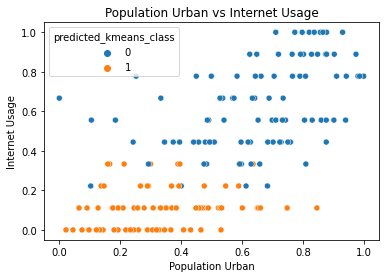

In [537]:
#PLOTTING--- Population Urban vs Internet Usage

sns.scatterplot(x="Population Urban", y="Internet Usage",hue="predicted_kmeans_class", data=result)
plt.title('Population Urban vs Internet Usage')
plt.show()

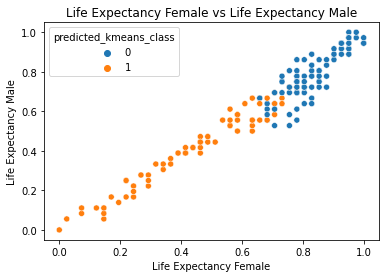

In [536]:
# Birth Rate vs Business Tax Rate

sns.scatterplot(x="Life Expectancy Female", y="Life Expectancy Male", hue="predicted_kmeans_class", data=result)
plt.title("Life Expectancy Female vs Life Expectancy Male")
plt.show()

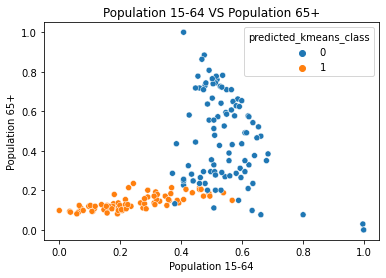

In [492]:
# Population 15-64 vs Population 65+

sns.scatterplot(x="Population 15-64", y="Population 65+", hue="predicted_kmeans_class", data=result)
plt.title("Population 15-64 VS Population 65+")
plt.show()

In [506]:
result1 = pd.concat([world_indicators_df, kmeans_df2], axis=1)
print(result1)

     Birth Rate Business Tax Rate  Days to Start Business  Energy Usage  \
0         0.025             72.0%                    25.0       41852.0   
1         0.046             52.1%                    66.0       13576.0   
2         0.037             65.9%                    29.0        3761.0   
3         0.024             19.5%                    60.0        2215.0   
4         0.042             43.5%                    13.0           NaN   
..          ...               ...                     ...           ...   
203         NaN               NaN                     NaN           NaN   
204       0.013             46.5%                     5.0     2191193.0   
205       0.015             41.9%                     7.0        4430.0   
206       0.020             62.8%                   141.0       70198.0   
207       0.011               NaN                     NaN           NaN   

                     GDP  Health Exp % GDP Health Exp/Capita  Hours to do Tax  \
0       $199,070,8

In [510]:
#country belonging to  cluter 0
new_result=result1[["Country", "predicted_kmeans_class"]]
new_result.loc[new_result["predicted_kmeans_class"] == 0]


Country  predicted_kmeans_class
14   Egypt, Arab Rep.                     0.0
30         Mauritania                     0.0
31          Mauritius                     0.0
39            Senegal                     0.0
46          Swaziland                     0.0
..                ...                     ...
166      Bahamas, The                     0.0
167          Barbados                     0.0
168            Belize                     0.0
169           Bermuda                     0.0
170           Bolivia                     0.0

[96 rows x 2 columns]

In [511]:
new_result.loc[new_result["predicted_kmeans_class"] == 1]

Country  predicted_kmeans_class
0                  Algeria                     1.0
1                   Angola                     1.0
2                    Benin                     1.0
3                 Botswana                     1.0
4             Burkina Faso                     1.0
..                     ...                     ...
155  Micronesia, Fed. Sts.                     1.0
156          New Caledonia                     1.0
157            New Zealand                     1.0
160        Solomon Islands                     1.0
162                Vanuatu                     1.0

[75 rows x 2 columns]

In [512]:
#calculating CH ratio
ch_kmeans=metrics.calinski_harabasz_score(world_indicators_final1, result['predicted_kmeans_class'])
ch_kmeans

192.54525050508803

In [513]:
#calculating dunn index
dunndist = pairwise_distances(world_indicators_final1)
dunn_kmeans = dunn(dunndist, result['predicted_kmeans_class'])
dunn_kmeans

0.12192108167876109

In [515]:
#silhouette score
silhouette_score_kmeans= silhouette_score(world_indicators_final1, result['predicted_kmeans_class'])
silhouette_score_kmeans

0.42987453131766545

HIERARCHICAL CLUSTERING

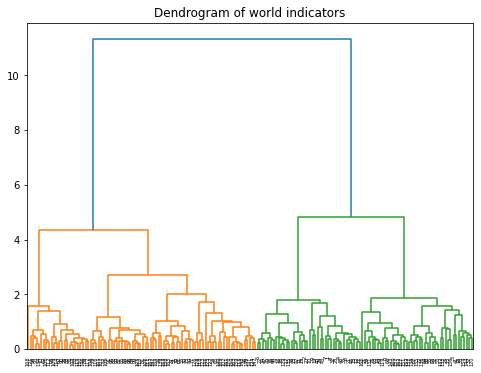

In [516]:
#Dendrogram
plt.figure(figsize=(8,6))  
plt.title("Dendrogram of world indicators")
dendw = shc.dendrogram(shc.linkage(world_indicators_final1, method='ward'))

In [517]:
#clusters
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
aw=cluster.fit_predict(world_indicators_final1)
aw

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1])

In [518]:
hier_df = pd.DataFrame(aw, columns = ['predicted_hier_class'])

In [519]:
result1 = pd.concat([world_indicators_final1,hier_df ], axis=1)
print(result1)

     Birth Rate  Business Tax Rate  Days to Start Business       GDP  \
0      0.404762           0.192319                0.034632  0.012804   
1      0.904762           0.132144                0.093795  0.006692   
2      0.690476           0.173874                0.040404  0.000459   
3      0.380952           0.033565                0.085137  0.000973   
4      0.809524           0.106138                0.017316  0.000658   
..          ...                ...                     ...       ...   
166    0.238095           0.058966                1.000000  0.000270   
167    0.166667           0.062594                0.057720  0.001513   
168    0.119048           0.115210                0.005772  1.000000   
169    0.166667           0.101300                0.008658  0.003030   
170    0.285714           0.164500                0.202020  0.020363   

     Health Exp % GDP  Health Exp/Capita  Hours to do Tax  \
0            0.158228           0.022332         0.169629   
1            

In [527]:
result2 = pd.concat([world_indicators_df,hier_df ], axis=1)
print(result2)

     Birth Rate Business Tax Rate  Days to Start Business  Energy Usage  \
0         0.025             72.0%                    25.0       41852.0   
1         0.046             52.1%                    66.0       13576.0   
2         0.037             65.9%                    29.0        3761.0   
3         0.024             19.5%                    60.0        2215.0   
4         0.042             43.5%                    13.0           NaN   
..          ...               ...                     ...           ...   
203         NaN               NaN                     NaN           NaN   
204       0.013             46.5%                     5.0     2191193.0   
205       0.015             41.9%                     7.0        4430.0   
206       0.020             62.8%                   141.0       70198.0   
207       0.011               NaN                     NaN           NaN   

                     GDP  Health Exp % GDP Health Exp/Capita  Hours to do Tax  \
0       $199,070,8

In [528]:
#country belonging to  cluter 0
new_result1=result2[["Country", "predicted_hier_class"]]
new_result1.loc[new_result["predicted_kmeans_class"] == 0]

Country  predicted_hier_class
14   Egypt, Arab Rep.                   0.0
30         Mauritania                   1.0
31          Mauritius                   1.0
39            Senegal                   1.0
46          Swaziland                   1.0
..                ...                   ...
166      Bahamas, The                   0.0
167          Barbados                   1.0
168            Belize                   1.0
169           Bermuda                   1.0
170           Bolivia                   1.0

[96 rows x 2 columns]

In [529]:
#country belonging to  cluter 1
new_result1=result2[["Country", "predicted_hier_class"]]
new_result1.loc[new_result["predicted_kmeans_class"] == 1]

Country  predicted_hier_class
0                  Algeria                   0.0
1                   Angola                   0.0
2                    Benin                   0.0
3                 Botswana                   0.0
4             Burkina Faso                   0.0
..                     ...                   ...
155  Micronesia, Fed. Sts.                   0.0
156          New Caledonia                   0.0
157            New Zealand                   0.0
160        Solomon Islands                   0.0
162                Vanuatu                   0.0

[75 rows x 2 columns]

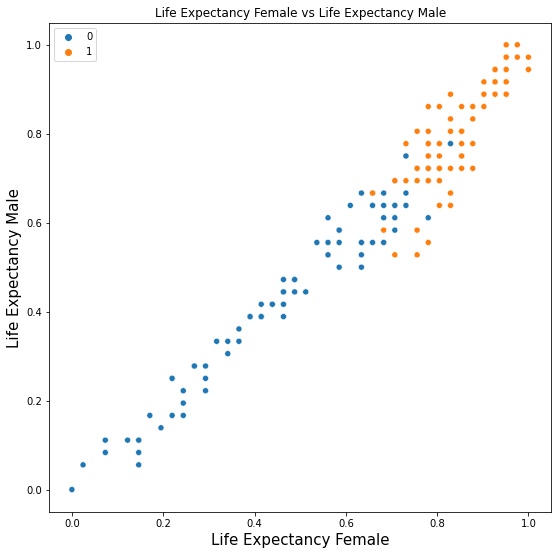

In [535]:
# plotting Life Expectancy Female vs Life Expectancy Male
fig = plt.figure(figsize = (9,9))
sns.scatterplot(x="Life Expectancy Female", y="Life Expectancy Male",hue="predicted_hier_class", data=result1)
plt.title('Life Expectancy Female vs Life Expectancy Male')
plt.xlabel('Life Expectancy Female', fontsize=15)
plt.ylabel('Life Expectancy Male', fontsize=15)
plt.legend()
plt.title("Life Expectancy Female vs Life Expectancy Male")
plt.show()

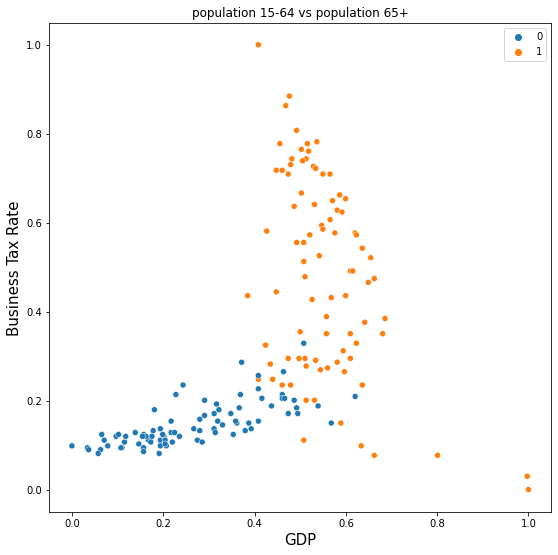

In [533]:
#population 15-64 vs population 65+
fig = plt.figure(figsize = (9,9))
sns.scatterplot(x="Population 15-64", y="Population 65+",hue="predicted_hier_class", data=result1)
plt.title('GDP vs Business Tax Rate')
plt.xlabel('GDP', fontsize=15)
plt.ylabel('Business Tax Rate', fontsize=15)
plt.legend()
plt.title("population 15-64 vs population 65+")
plt.show()

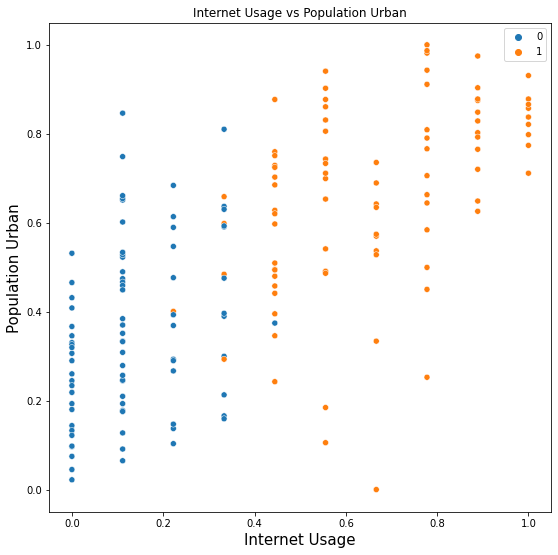

In [534]:
#Internet Usage vs Population Urban
fig = plt.figure(figsize = (9,9))
sns.scatterplot(x="Internet Usage", y="Population Urban",hue="predicted_hier_class", data=result1)
plt.title('Internet Usage vs Population Urban')
plt.xlabel('Internet Usage', fontsize=15)
plt.ylabel('Population Urban', fontsize=15)
plt.legend()
plt.title("Internet Usage vs Population Urban")
plt.show()

In [523]:
#CH ratio calculation
ch_hier=metrics.calinski_harabasz_score(world_indicators_final1, result1['predicted_hier_class'])
ch_hier

184.87996192103543

In [524]:
#dunn index calculation
dunn_hier = dunn(dunndist, result1['predicted_hier_class'])
dunn_hier

0.14142629053178704

In [526]:
#silhouette score
silhouette_score_hier= silhouette_score(world_indicators_final1, result1['predicted_hier_class'])
silhouette_score_hier

0.4176400922367597

KMEANS IS A BETTER CLUSTERING METHOD FOR THIS DATASET DUE TO THE FACT THAT KMEANS SILHOUETE SCORE IS GREATER THAN THE SILHOUETE SCORE OF HIERARCHICAL CLUSTERING (0.42987453 > 0.41764009) 